# <p style="text-align: center; color: green;"><strong>SVM et Réseaux de neurones</strong></p>




**Importation des packages et library**

In [374]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px         
import seaborn as sns
import warnings

from scipy.stats import chi2_contingency # Chi2 test

from scipy.stats import zscore # Outliers function

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression


#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Model OVO et OVR 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Indicateurs de précision, qualité du modèle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.inspection import permutation_importance



**Données**

In [2]:
wine = pd.read_csv('data/winequalityN.csv')

In [3]:
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


L'importation des données est correcte.
Il faut dorénavant réaliser des analyses statistiques sur notre base. 

In [1021]:
len(wine)

6497

6497 observations.

# **A . Analyse exploratoire**

Dans notre analyse, nous voulons réaliser des modélisations sur deux target différentes. Une sur la variable quality et une sur la variable type.

La modélisation sur la variable quality se fera par des méthodes de classificiations multiclass et pour la target type, nous utiliserons une classifications binaire.

Nous allons donc faire une analyse exploratoire avec deux targets différentes

## I - Analyse univariée 

        A) Target 'quality'

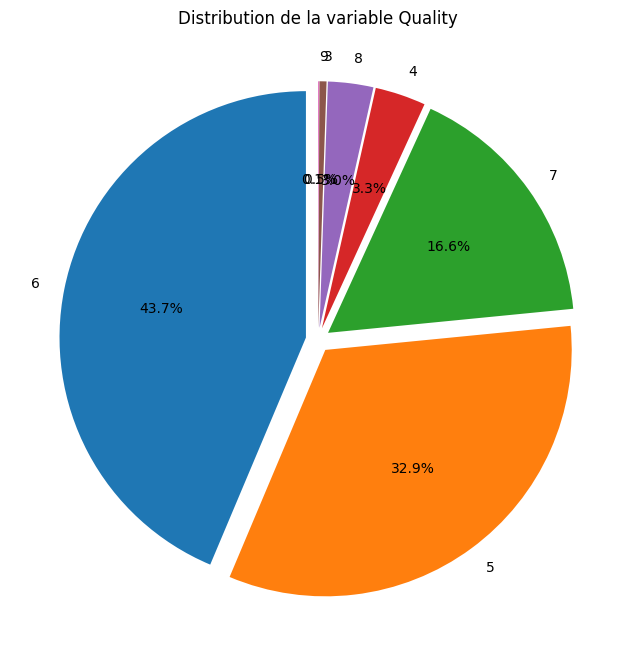

In [4]:
# Créez un diagramme en camembert
plt.figure(figsize=(8, 8))
wine['quality'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05] * len(wine['quality'].unique()))
plt.title('Distribution de la variable Quality')
plt.ylabel('')  # Pour supprimer l'étiquette par défaut

# Affichez le diagramme
plt.show()

In [5]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

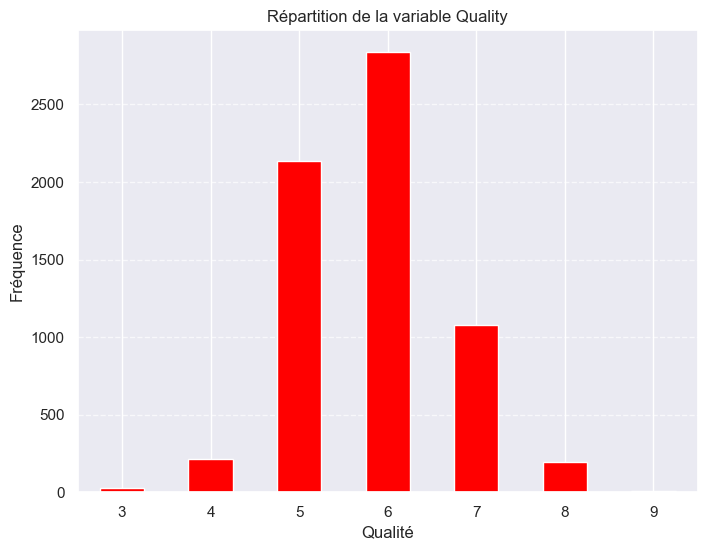

In [1023]:
# Diagramme en boite 
plt.figure(figsize=(8, 6))
wine['quality'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Répartition de la variable Quality')
plt.xlabel('Qualité')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)  # Les étiquettes sont affichées horizontalement pour une meilleure lisibilité.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

    B) Target 'type'

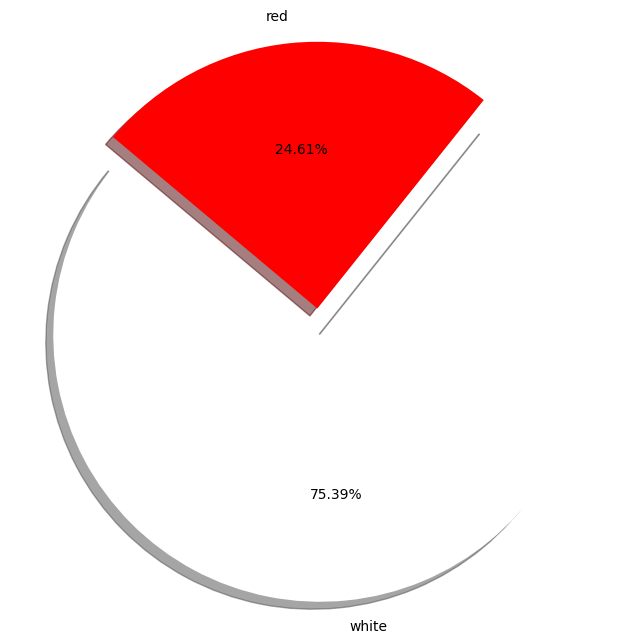

In [6]:
# Paramètres du pie chart
colors = ['white', 'red']  # Couleurs des tranches
explode = (0.1, 0)  # Espace entre les tranches (0.1 pour la première tranche)

# Création du pie chart avec des options améliorées
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.pie(
    wine['type'].value_counts(normalize=True).values,
    labels=wine['type'].value_counts(normalize=True).index,
    autopct='%1.2f%%',
    colors=colors,
    explode=explode,
    shadow=True,  # Ajoute une ombre
    startangle=140  # Angle de départ pour le premier coin du pie chart
)

plt.title("")
plt.axis('equal')  # Assure que le pie chart est un cercle parfait

# Affiche le graphique
plt.show()

In [7]:
wine.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

## II - Distribution des features

Ensuite l'ensemble des variables restantes dans notre base sont des variables quantitatives. 

Nous allons donc regarder leurs distributions avec des histogrammes.

In [8]:
# Configuration du style seaborn
sns.set(style='darkgrid')

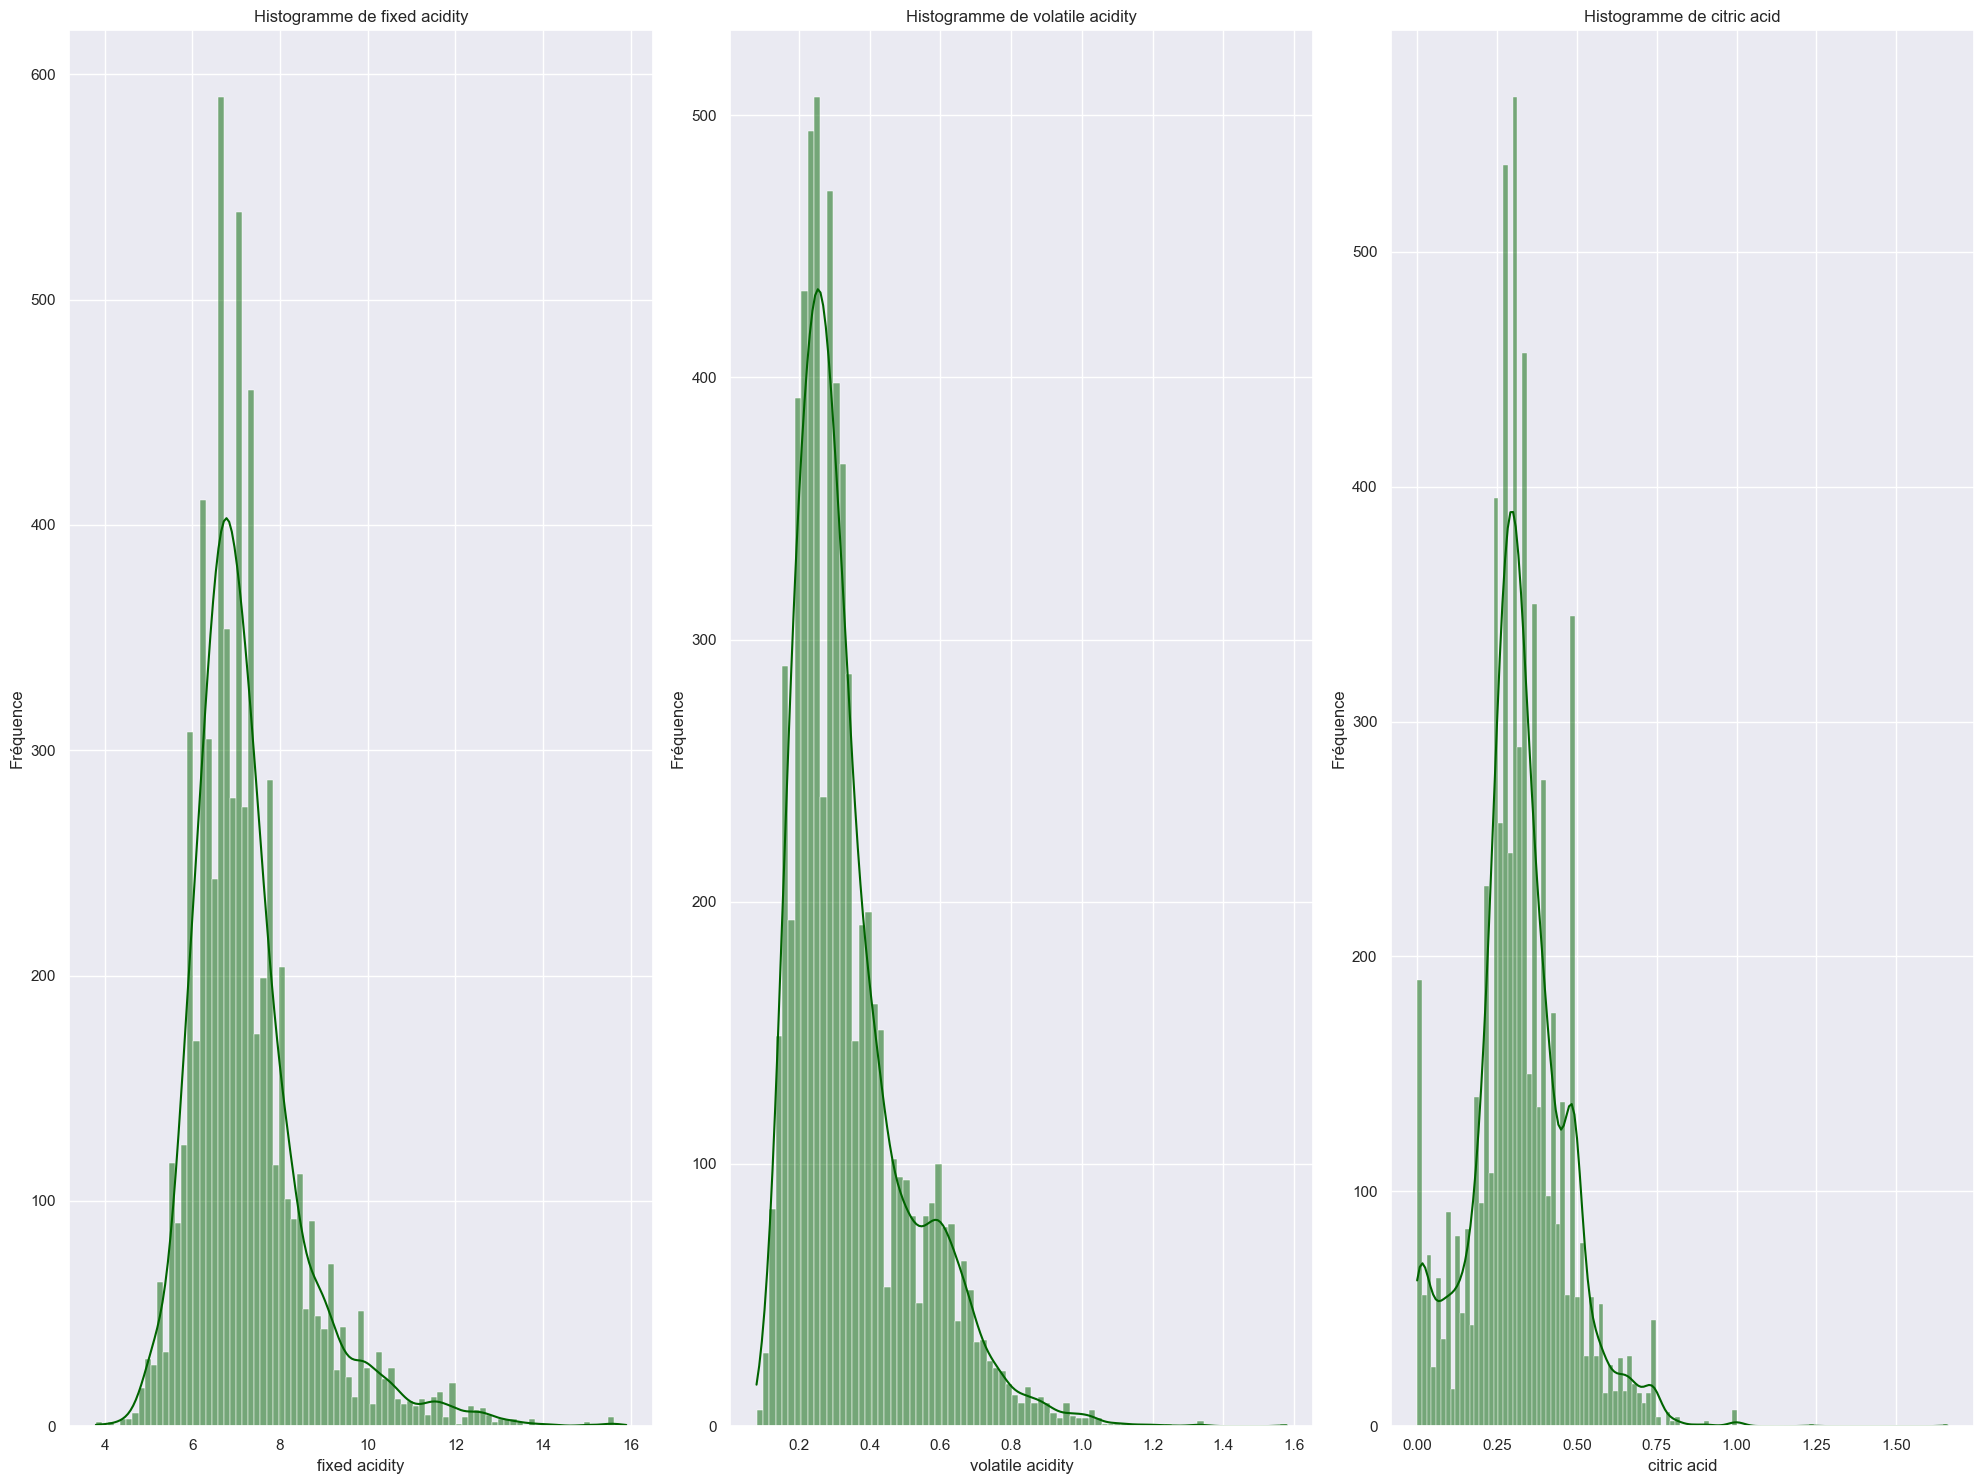

In [9]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine.columns[1:4], 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=column, data=wine, kde=True, color="darkgreen")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de {column}")

plt.tight_layout()
plt.show()

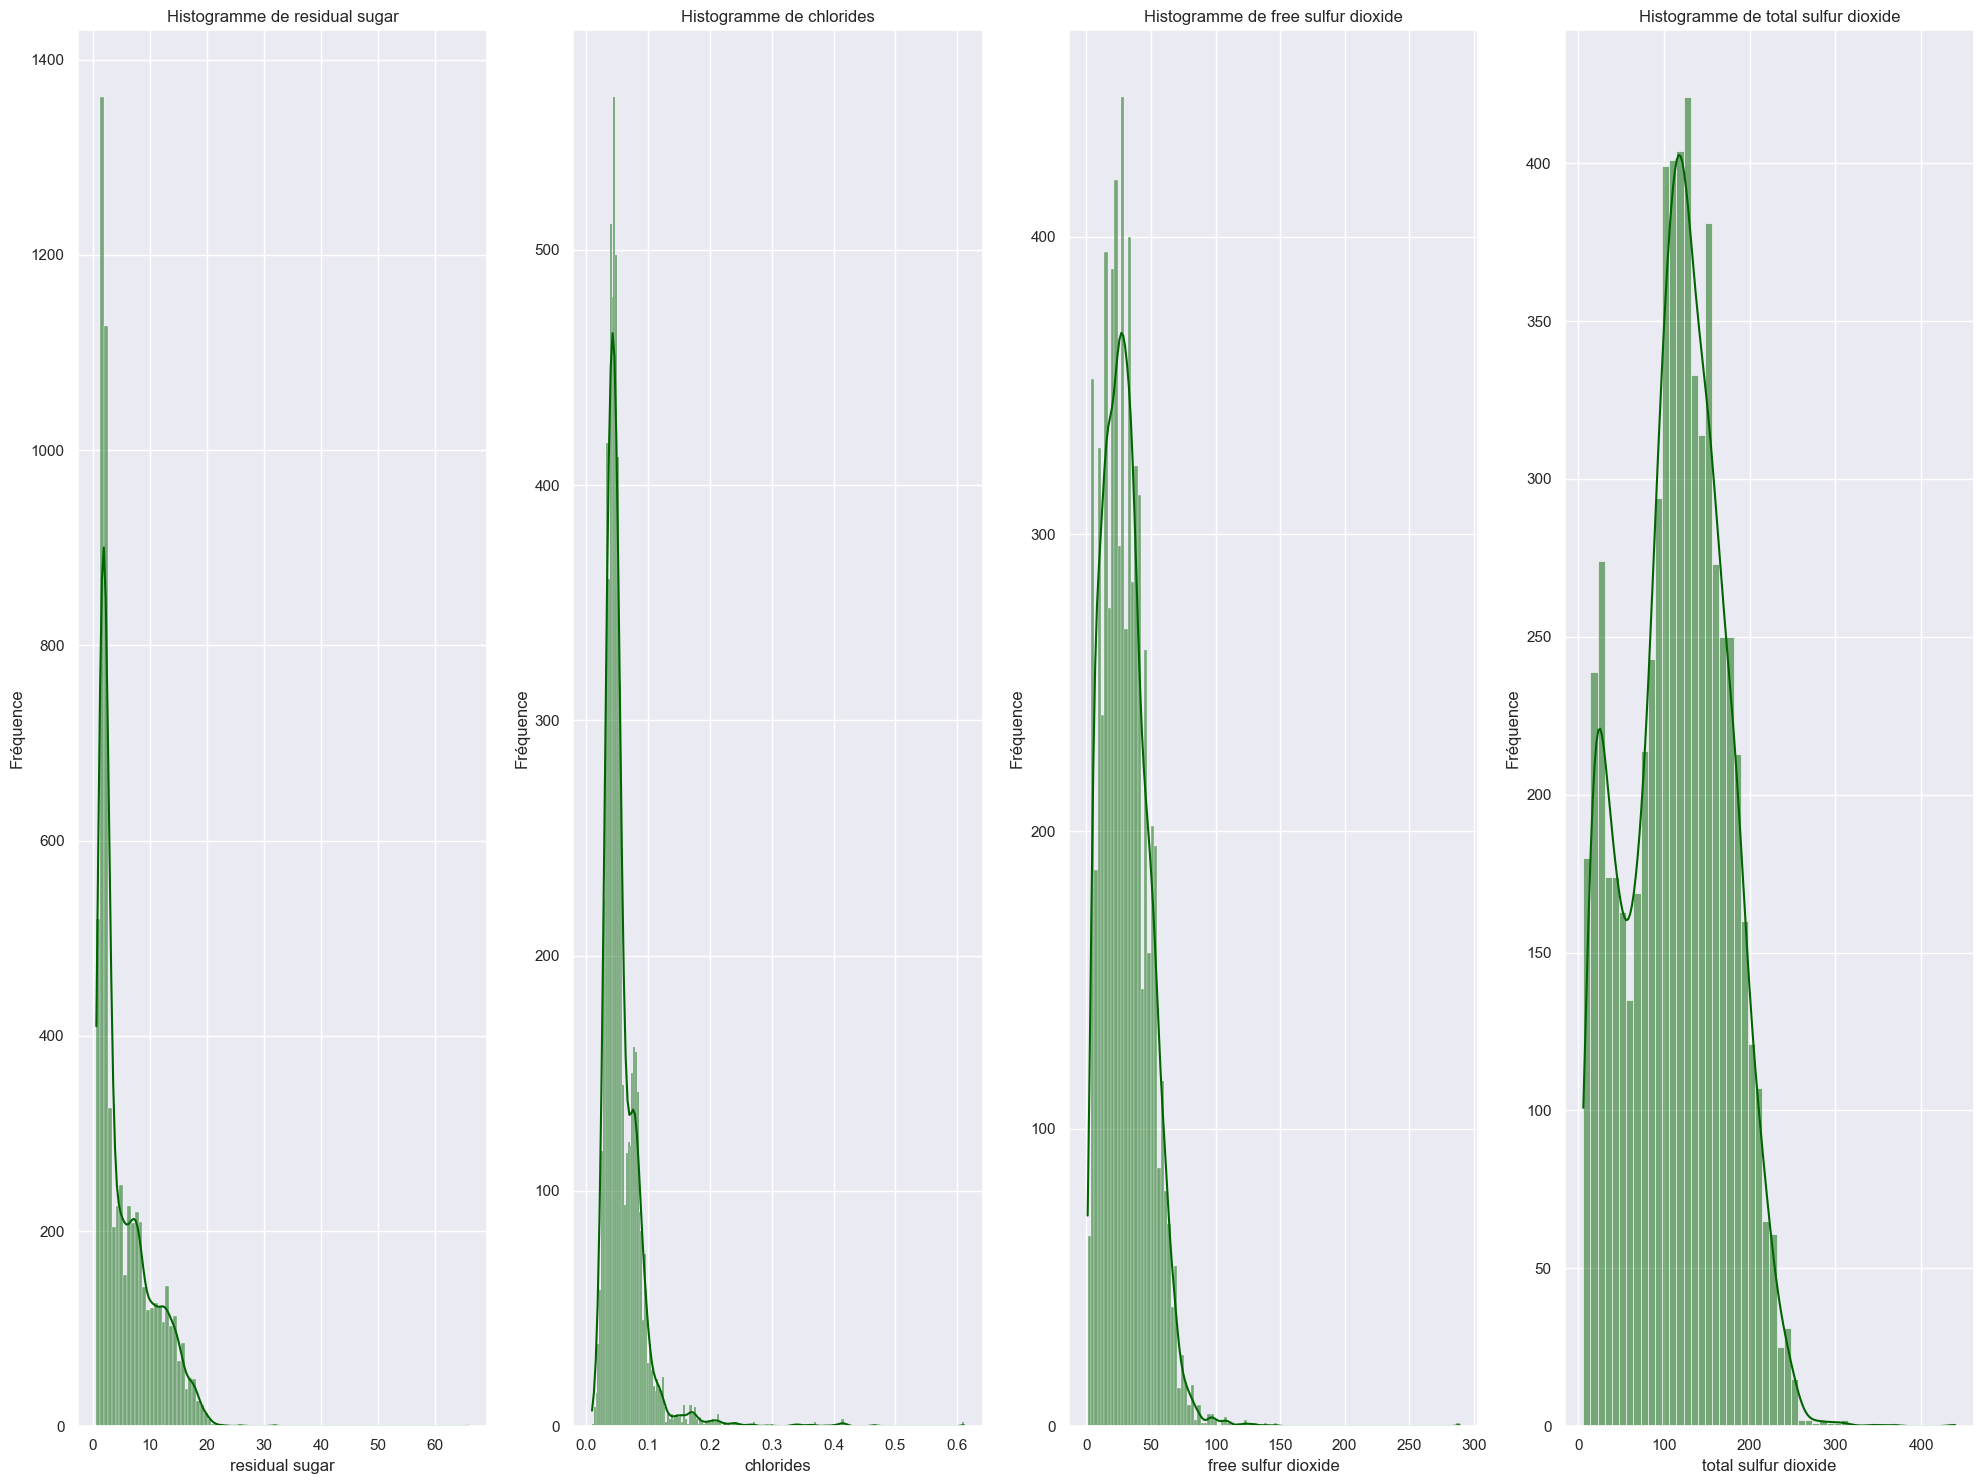

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine.columns[4:8], 1):
    plt.subplot(1, 4, i)
    sns.histplot(x=column, data=wine, kde=True, color="darkgreen")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de {column}")

plt.tight_layout()
plt.show()

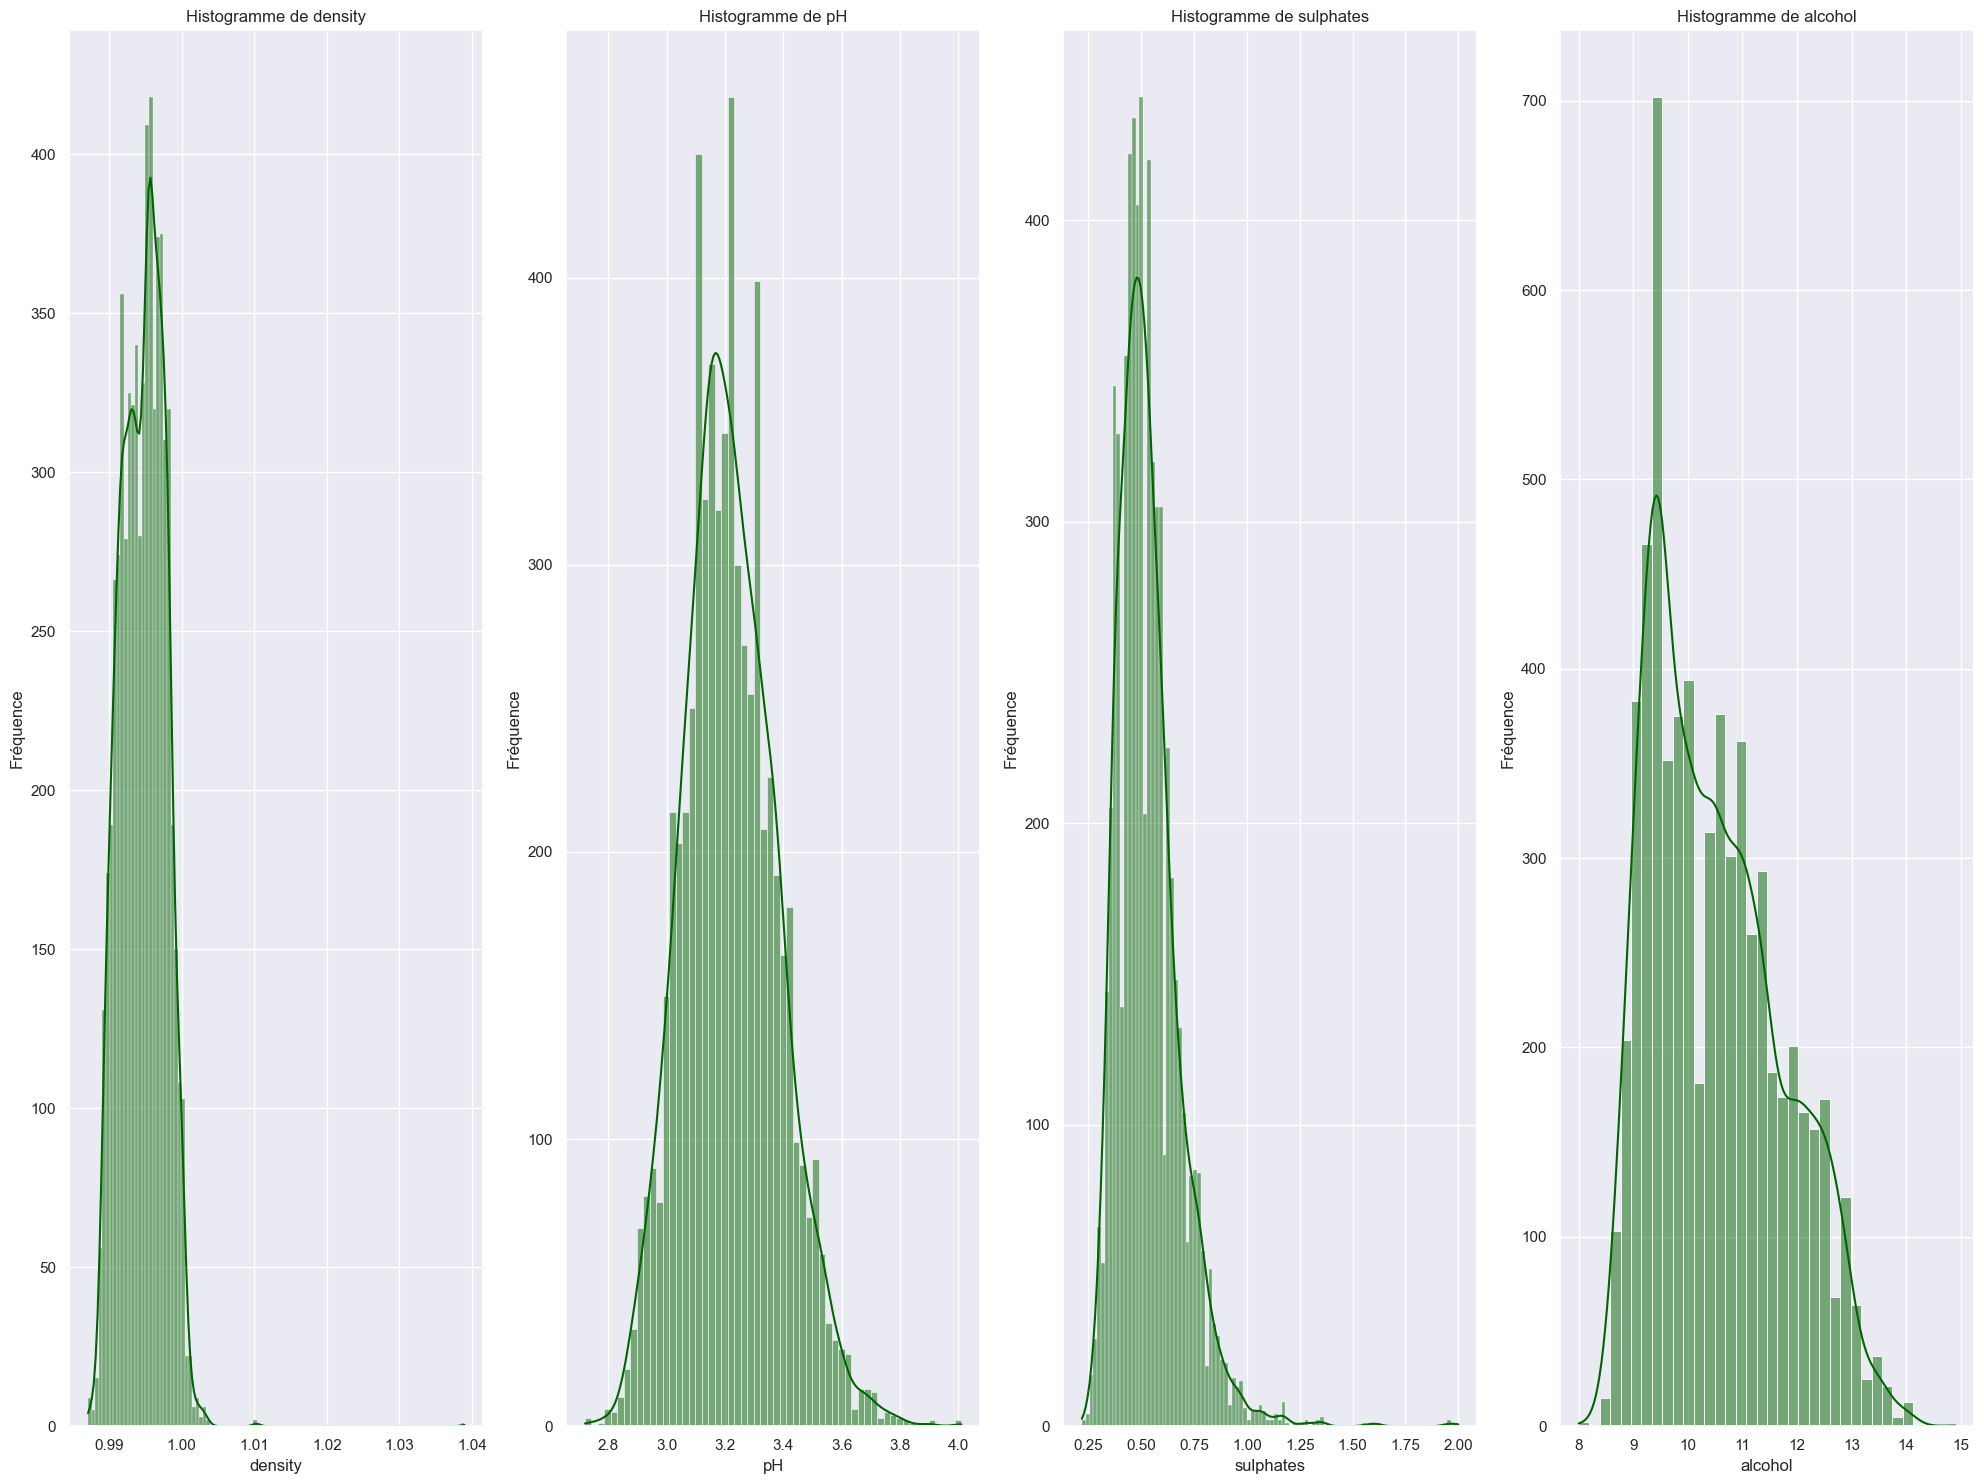

In [11]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine.columns[8:12], 1):
    plt.subplot(1, 4, i)
    sns.histplot(x=column, data=wine, kde=True, color="darkgreen")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de {column}")

plt.tight_layout()
plt.show()

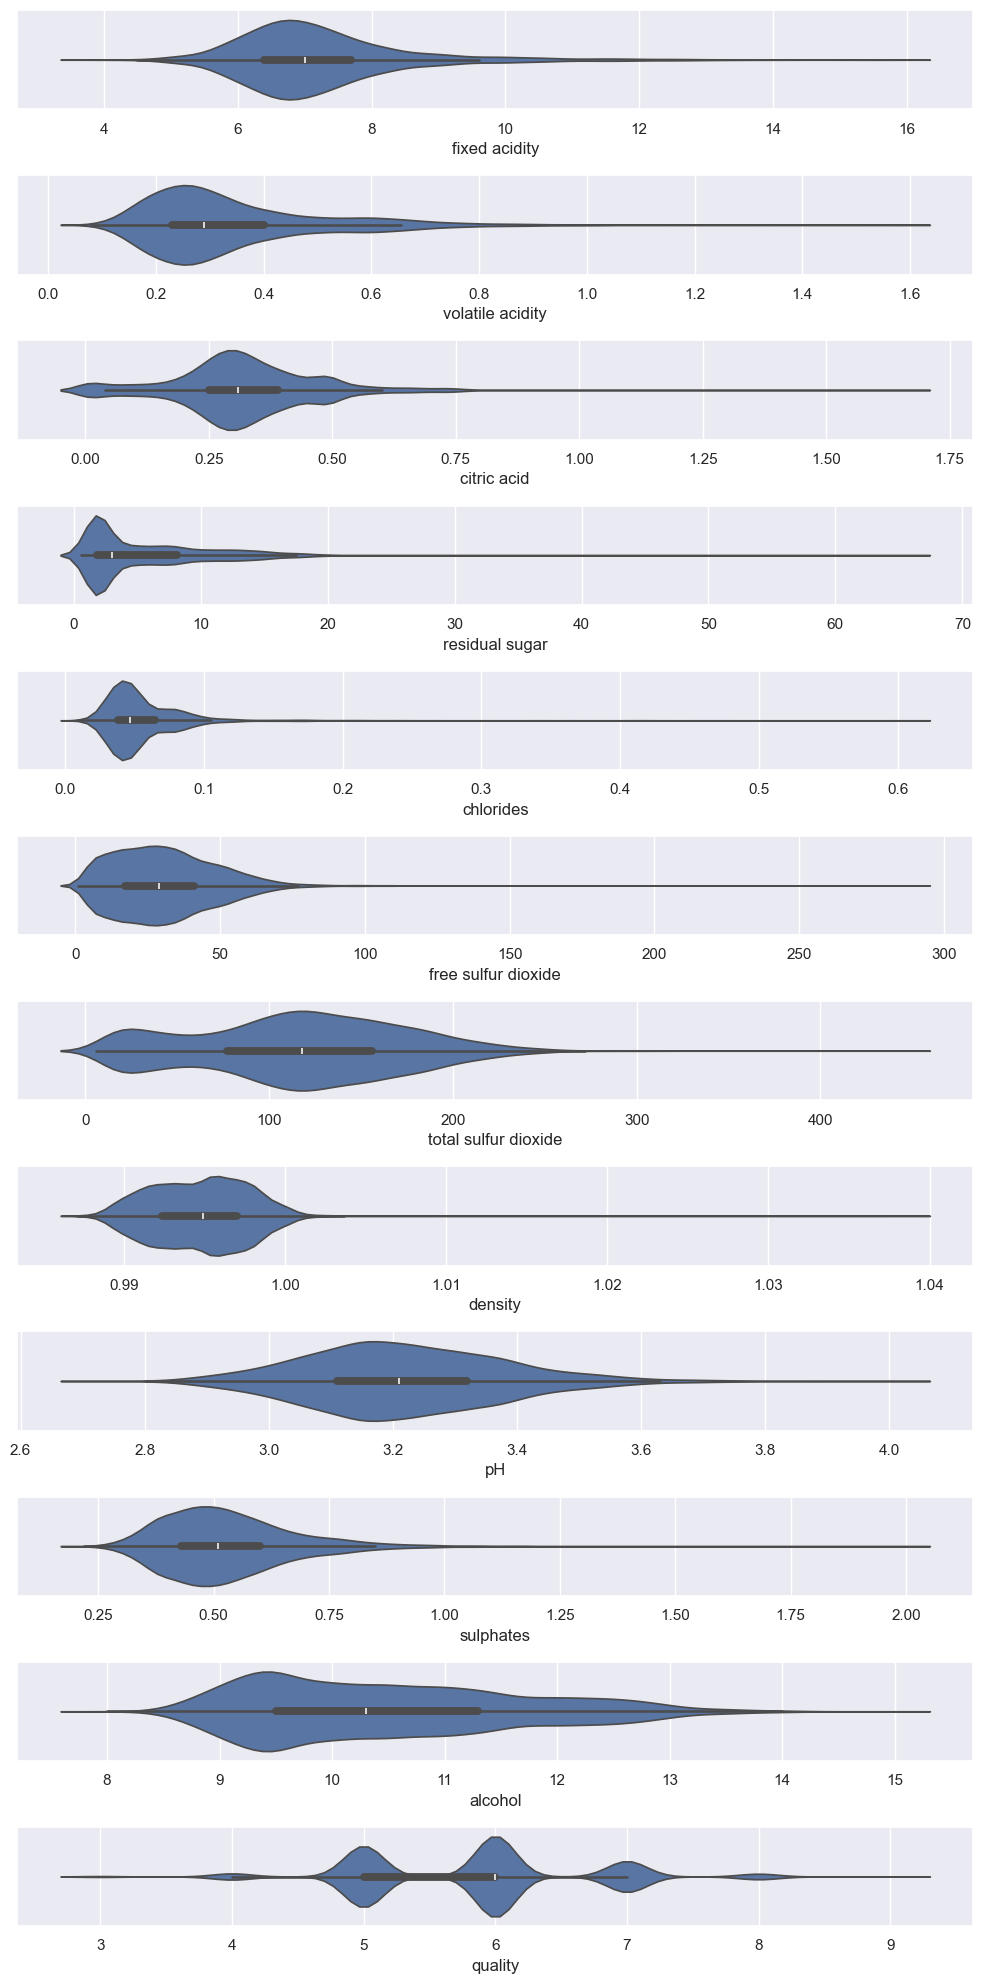

In [1022]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']:
    wine[col] = wine[col].astype(str).str.replace(',', '.').astype(float)
    
# Creating violin plots for each numeric variable
fig, axes = plt.subplots(nrows=len(wine.columns) - 1, figsize=(10, 20))
for i, col in enumerate(wine.columns):
    if col != 'type' and wine[col].dtype != 'object':  # Exclude non-numeric columns
        sns.violinplot(x=col, data=wine, ax=axes[i-1])

        

plt.tight_layout()
plt.show()

## III - Analyse bivariée

    A) Diagramme en barre (avec 'quality')

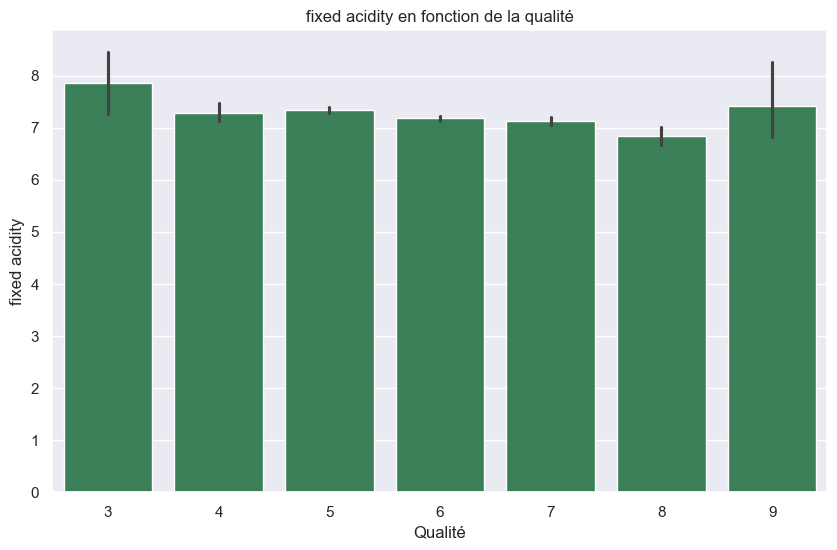

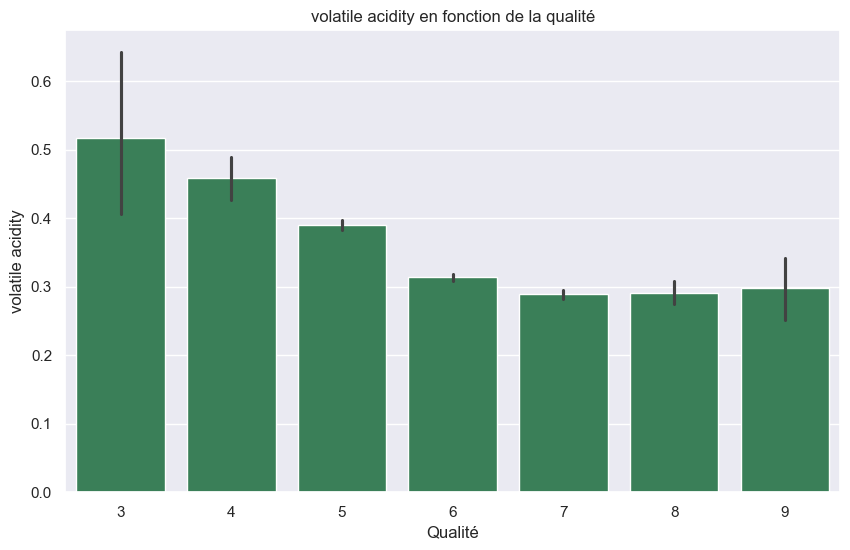

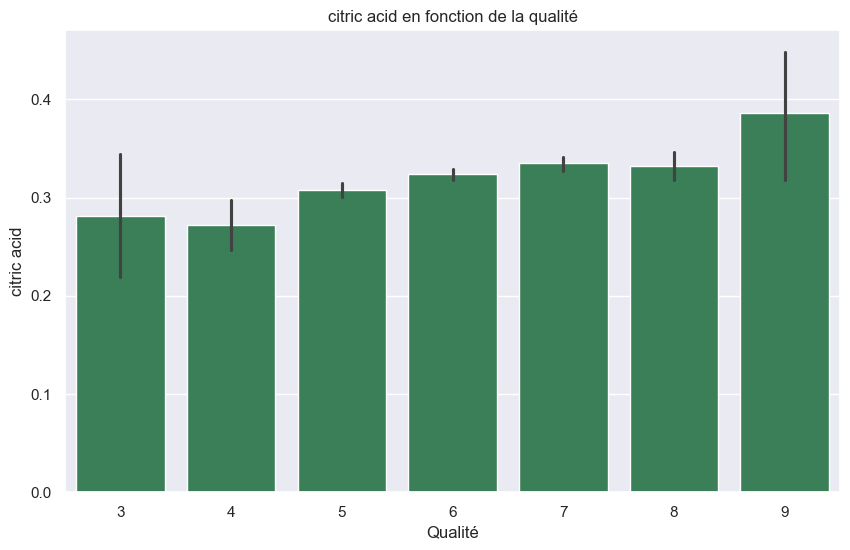

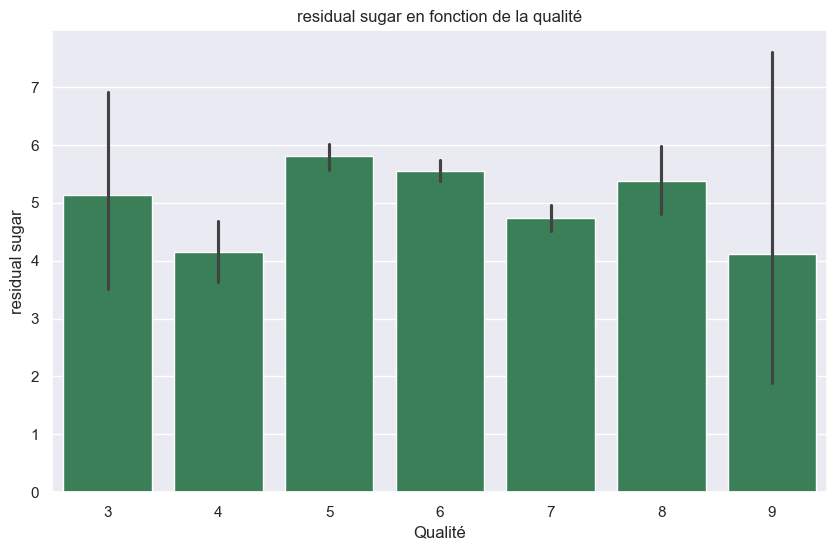

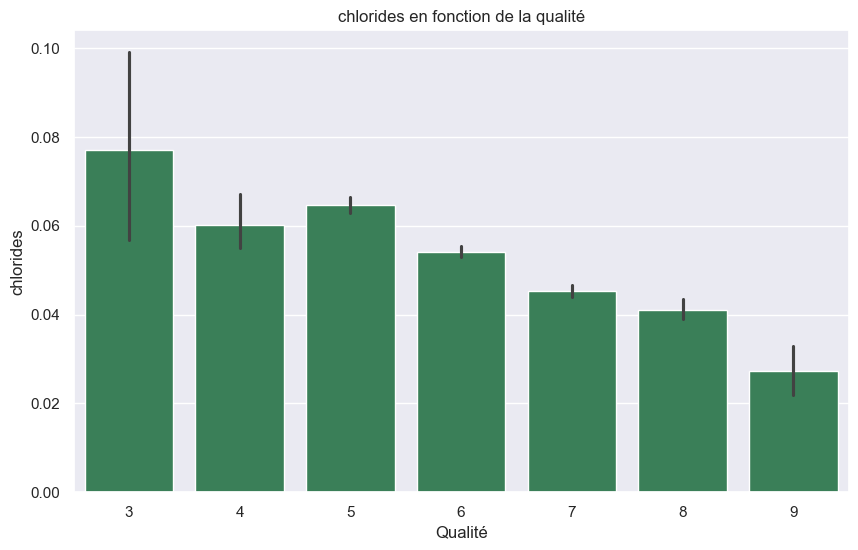

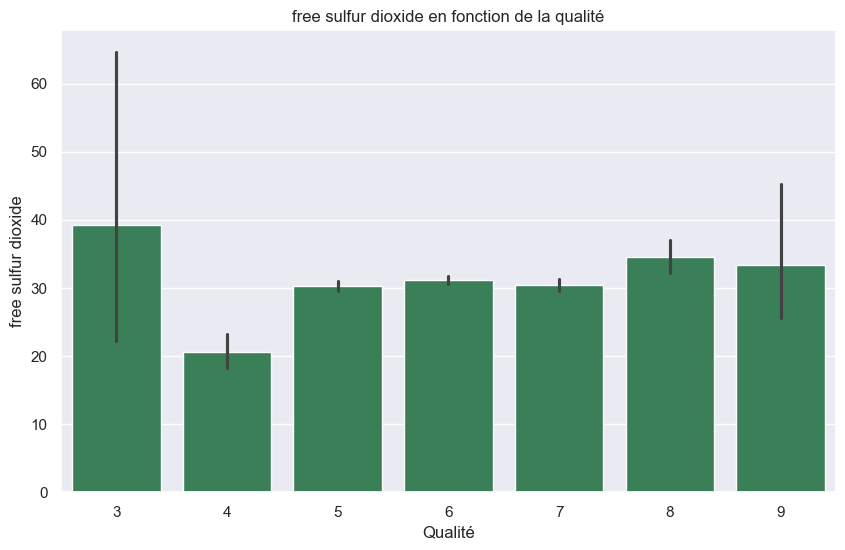

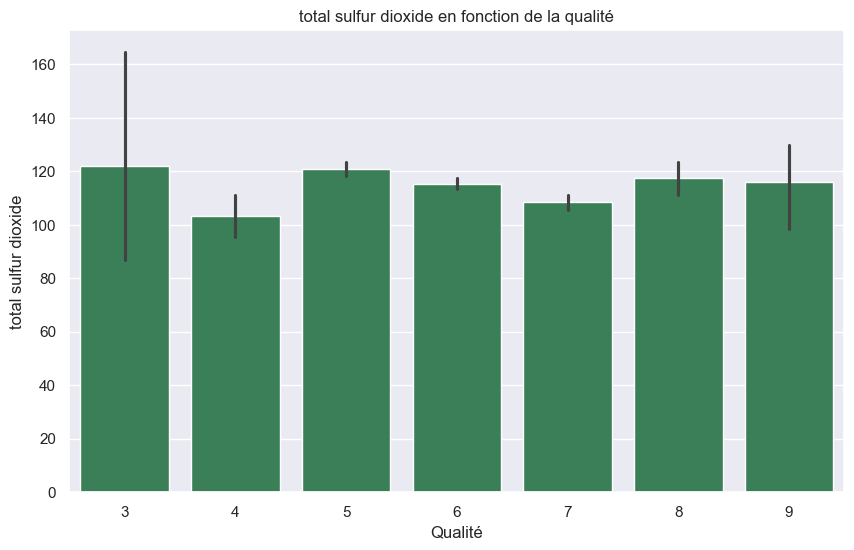

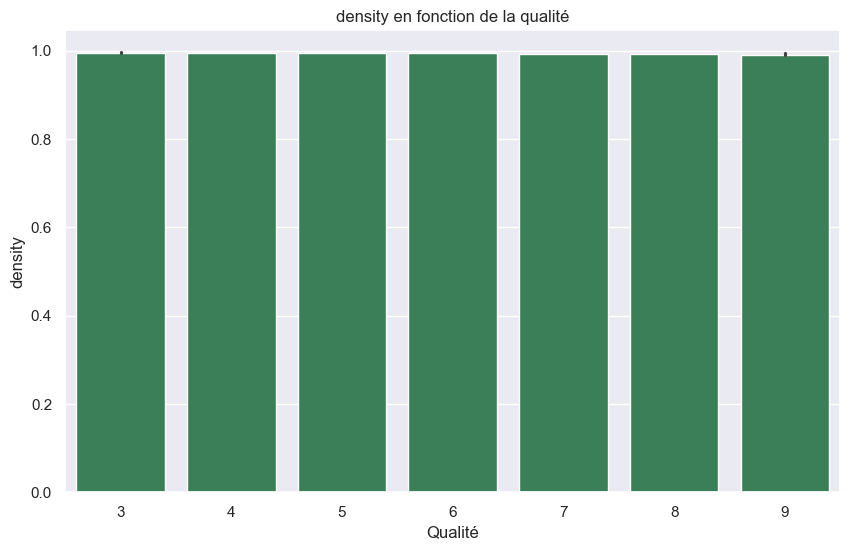

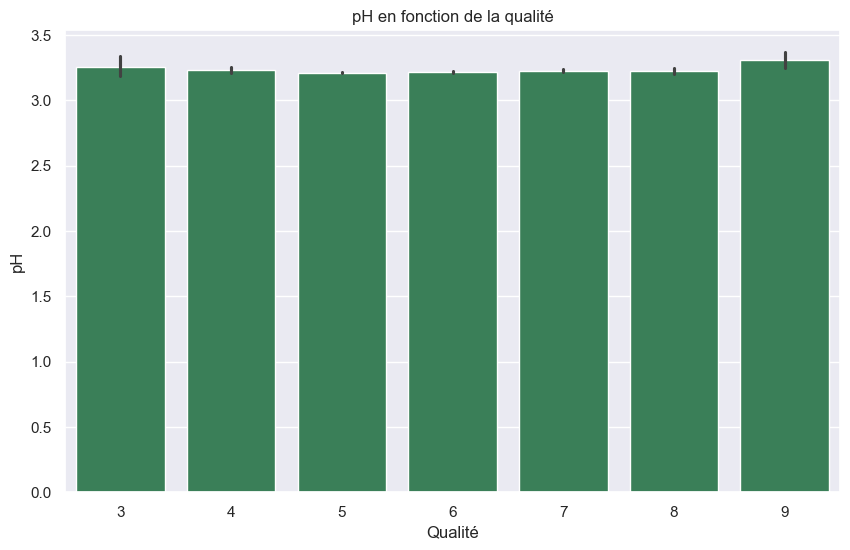

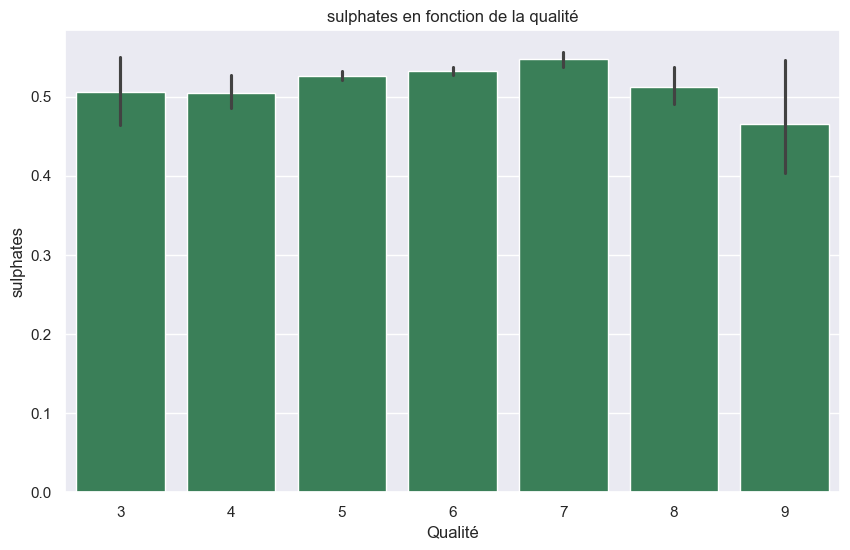

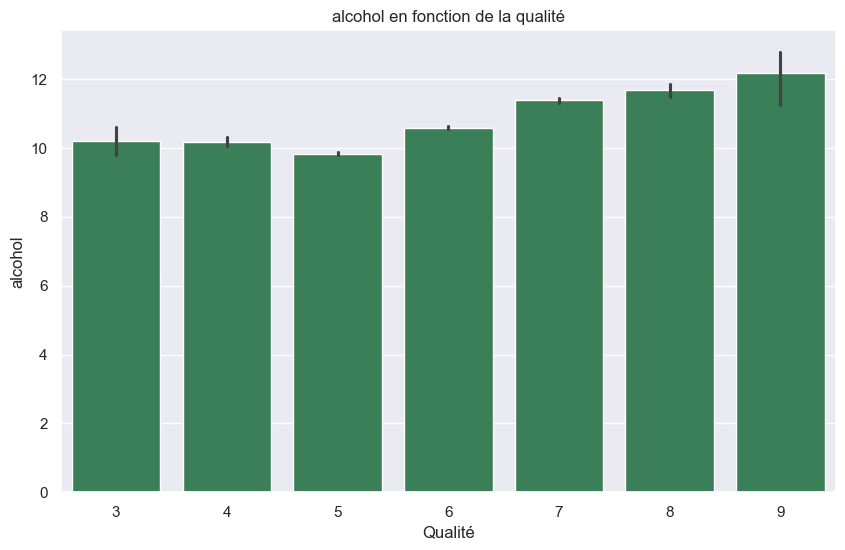

In [183]:
# Configuration du style seaborn
sns.set(style='darkgrid')

# Liste des colonnes quantitatives
quantitative_columns = wine.select_dtypes(include='float64').columns

for column in quantitative_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='quality', y=column, data=wine, color = 'seagreen')
    plt.title(f'{column} en fonction de la qualité')
    plt.xlabel('Qualité')
    plt.ylabel(column)
    plt.show()

    B) Diagramme en barres avec la target 'type'

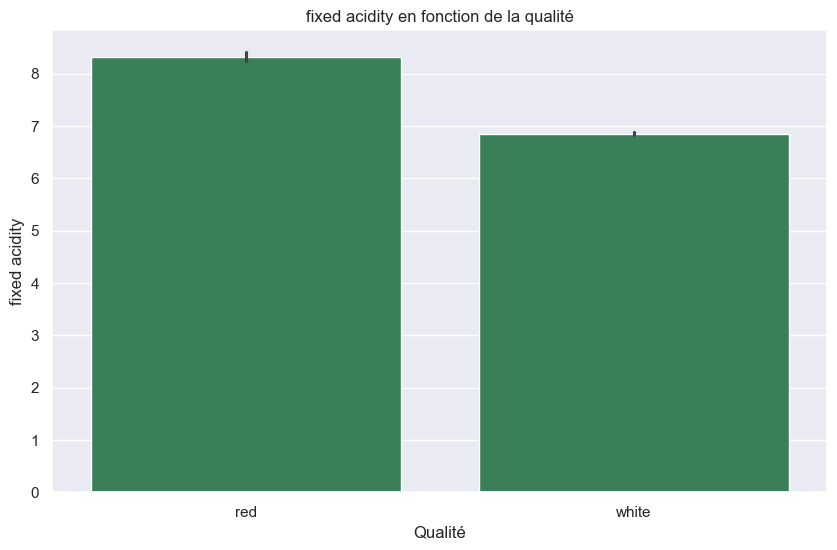

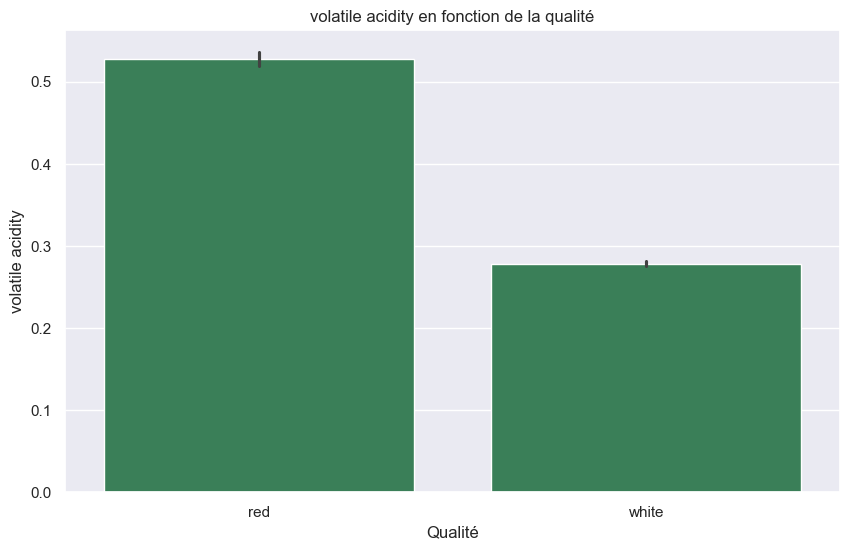

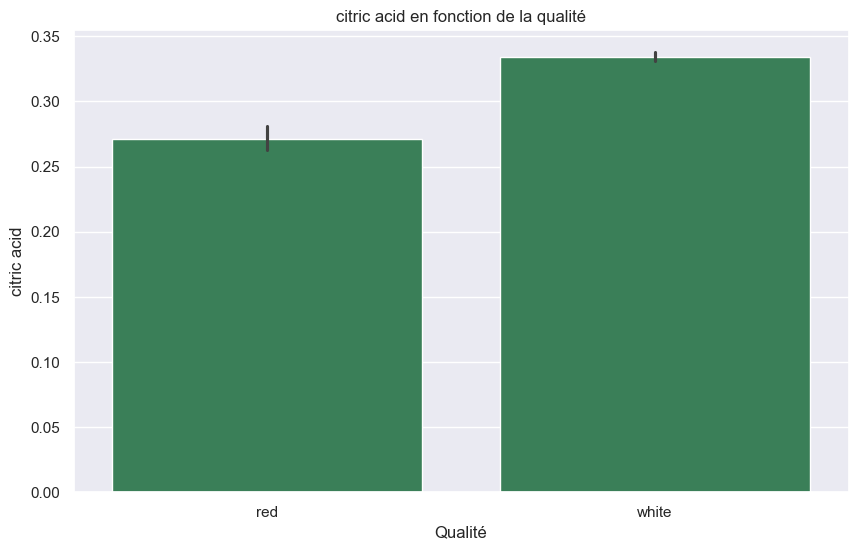

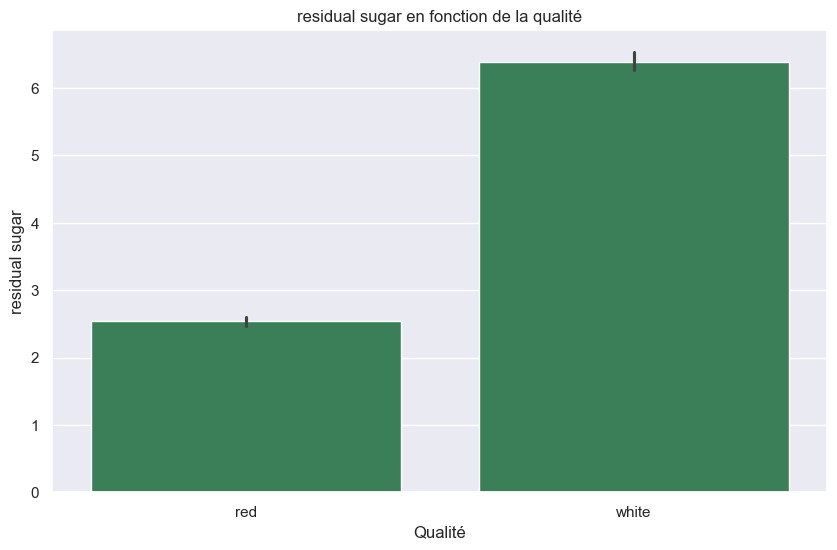

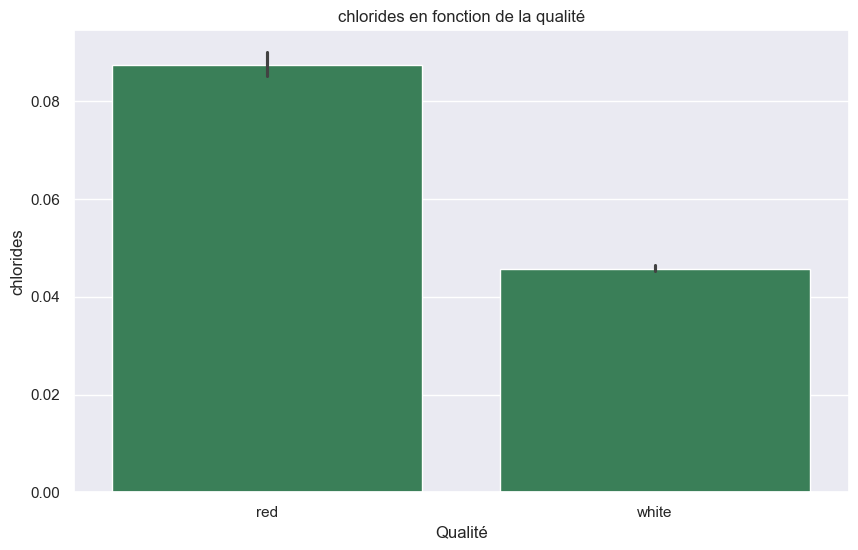

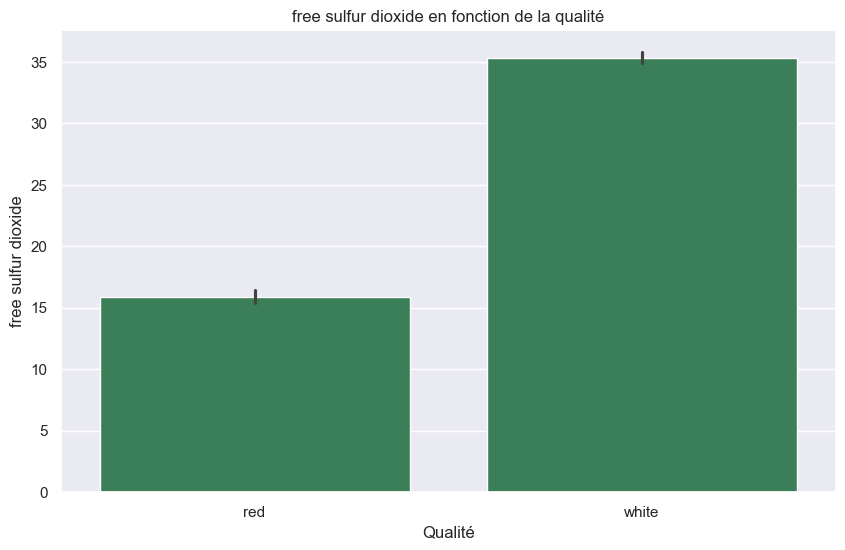

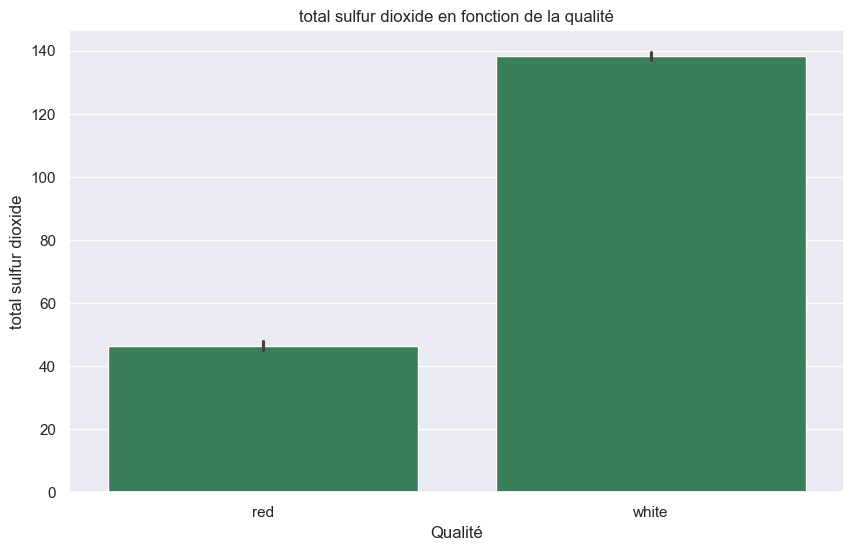

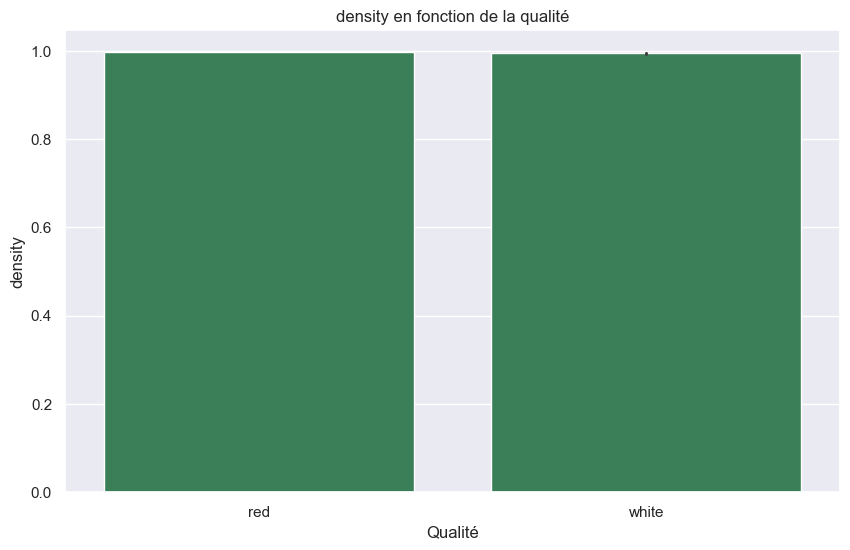

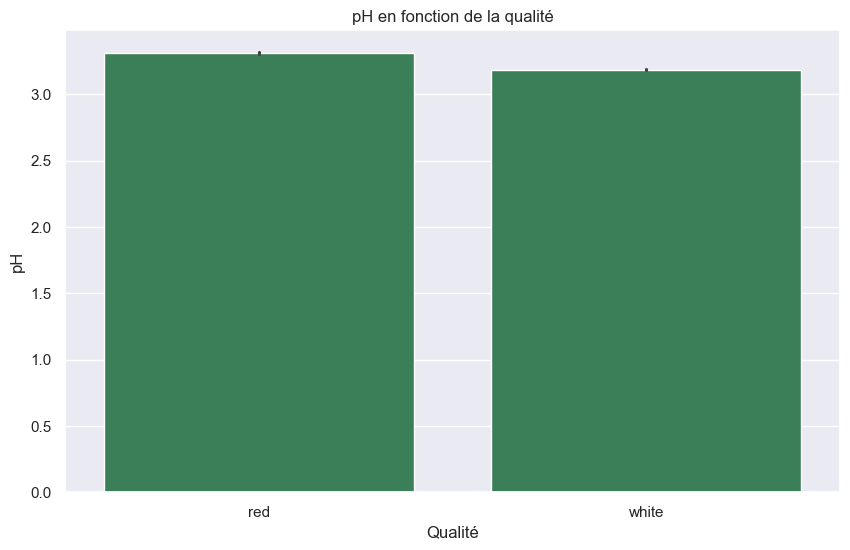

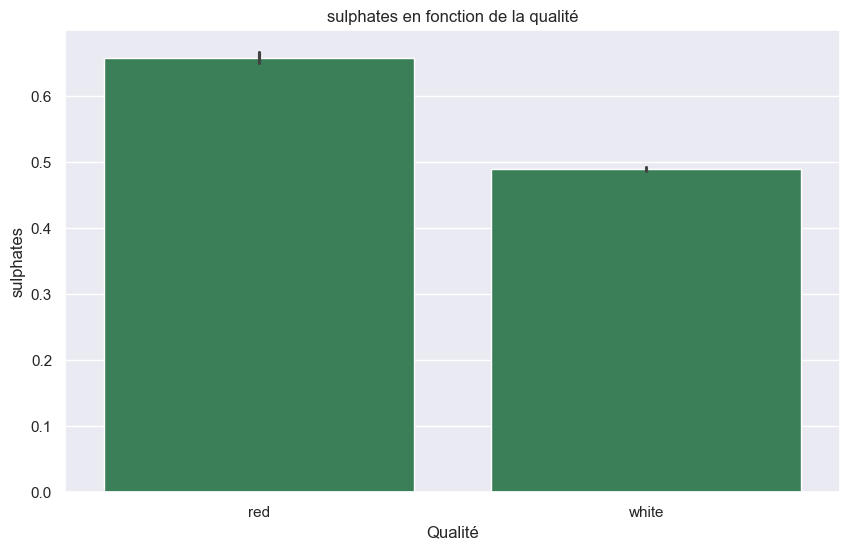

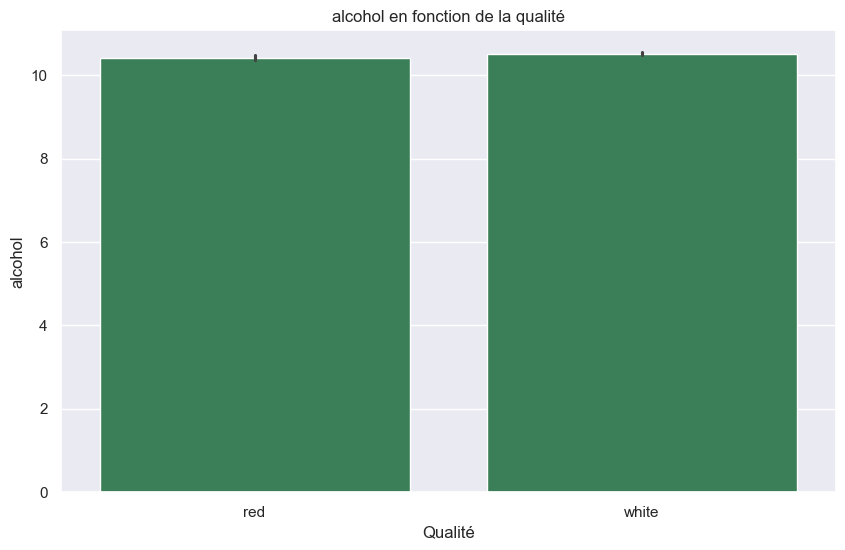

In [184]:
for column in quantitative_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='type', y=column, data=wine,color = 'seagreen')
    plt.title(f'{column} en fonction de la qualité')
    plt.xlabel('Qualité')
    plt.ylabel(column)
    plt.show()

    C) Diagramme entre les deux targets

/var/folders/nl/9lfy6hms1wbbvw2cf0y644_w0000gn/T/ipykernel_912/2277364021.py:15: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x='type', hue='quality', y='percentage', data=percentage_data, palette=custom_palette)


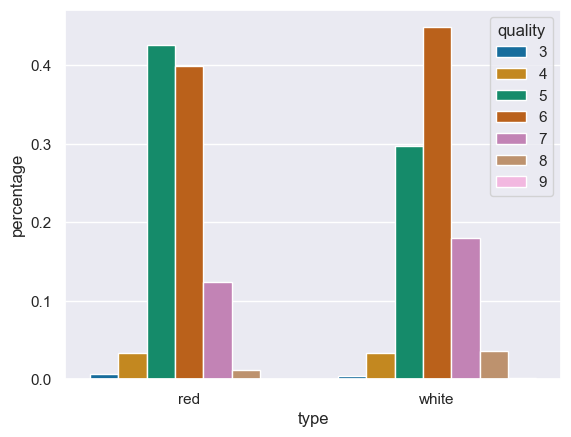

In [27]:
# Calcul des pourcentages
percentage_data = wine.groupby(['type', 'quality']).size() / wine.groupby('type').size()

# Convertir la série en DataFrame
percentage_data = percentage_data.reset_index(name='percentage')

# Palette : 
custom_palette = sns.color_palette("colorblind")

# Tracer le graphique avec la palette spécifiée
sns.barplot(x='type', hue='quality', y='percentage', data=percentage_data, palette=custom_palette)
plt.show()



In [343]:
#           Chi2 Test : 

contingency_table = pd.crosstab(wine_noOutliers['quality'], wine_noOutliers['type'])

# Effectuer le test de chi2
chi2, p, _, _ = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Test de Chi2 : {chi2}")
print(f"p-valeur : {p}")

Test de Chi2 : 117.02659331352102
p-valeur : 6.859915494191926e-23


Ho : Les variables qualitatives sont indépendantes. 

P.value < 5% :
- On rejette Ho au seuil de 5%
- Il y a donc une association significative entre les deux variables.
- Il y a une relation statistiquement significative entre la qualité du vin et le type de vin (blanc ou rouge)

## IV - Analyse multivariée

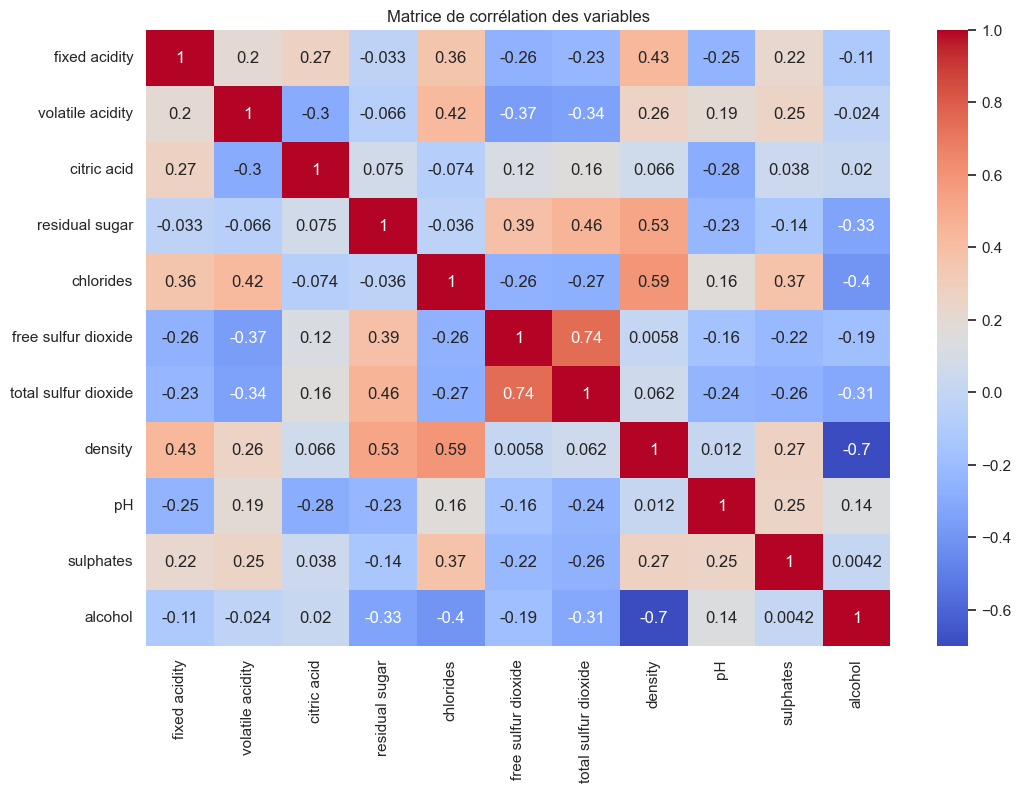

In [12]:
# Sélectionner les colonnes numériques
numerical_columns = wine.select_dtypes(include=['float64']).columns

# Créer un sous-DataFrame avec les colonnes numériques
numerical_data = wine[numerical_columns]

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr(method='spearman')

# Afficher le heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables')
plt.show()

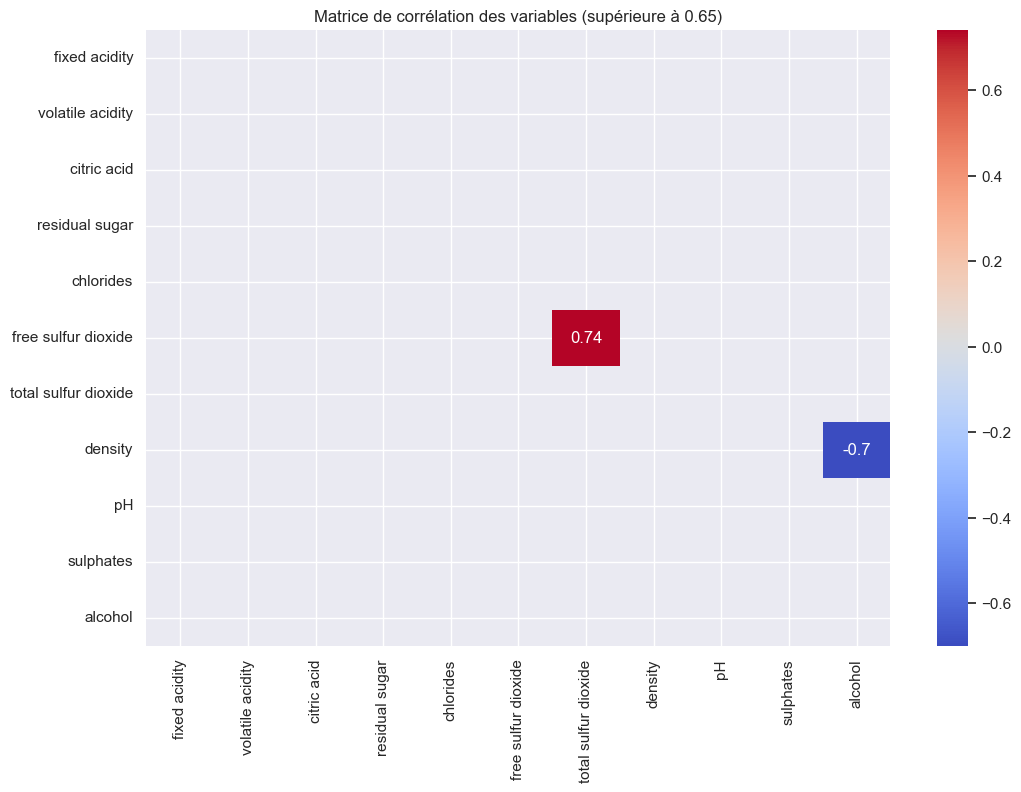

In [13]:
# Seuil de 0.60
threshold = 0.60
correlation_matrix_high = np.where(np.triu(np.abs(correlation_matrix) > threshold, k=1), correlation_matrix, np.nan)

# Créer un DataFrame avec la matrice modifiée
correlation_df_high = pd.DataFrame(correlation_matrix_high, columns=correlation_matrix.columns, index=correlation_matrix.index)

# Affichage de la matrice modifiée avec les noms de variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df_high, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables (supérieure à 0.65)')
plt.show()


2 variables fortement corrélées entre elle : 
- Alcool et densité : -0,70
- le dioxyde de soufre libre et le dioxyde de soufre total : 0,74.

Nous devons enlever deux variables dans les 2 relations, elles pourraient biaisés notre analyse. 
Nous enleverons la densité et le dioxyde de souffre libre. (regarder readme pour la justification)

In [37]:
# Supprimer les colonnes spécifiées
wine2 = wine.drop(['free sulfur dioxide', 'density'], axis=1)

# Afficher les premières lignes du nouveau DataFrame wine2
print(wine2.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  total sulfur dioxide    pH  sulphates  alcohol  quality  
0      0.045                 170.0  3.00       0.45      8.8        6  
1      0.049                 132.0  3.30       0.49      9.5        6  
2      0.050                  97.0  3.26       0.44     10.1        6  
3      0.058                 186.0  3.19       0.40      9.9        6  
4      0.058                 186.0  3.19       0.40      9.9        6  


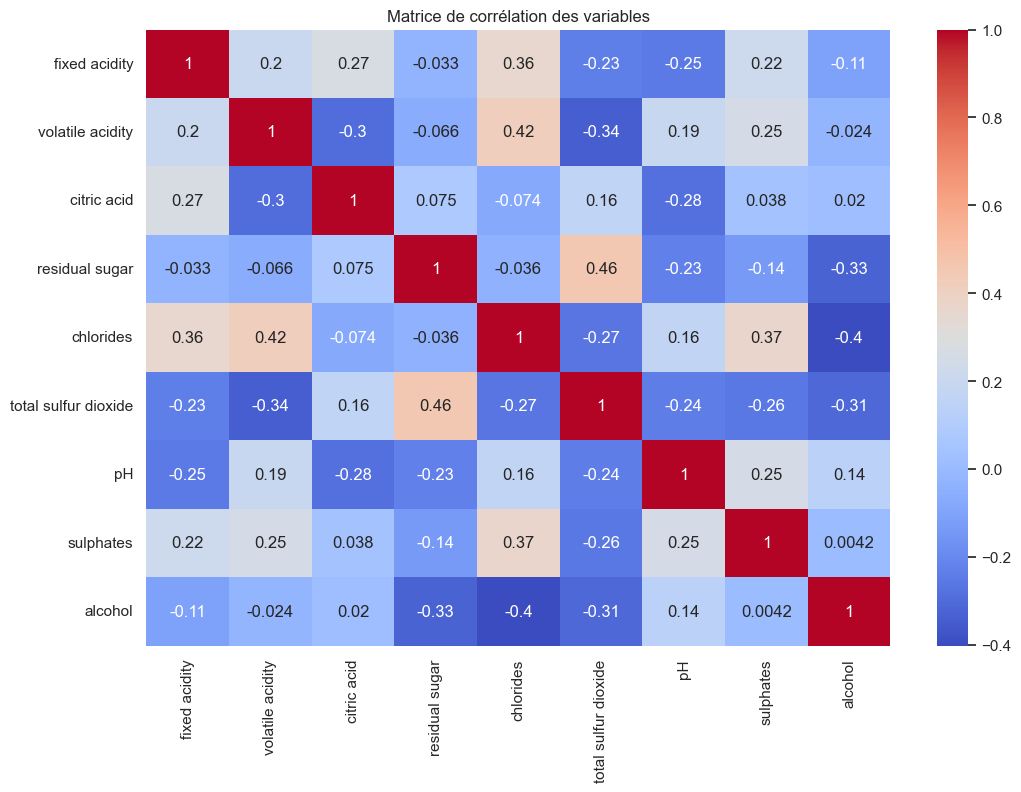

In [38]:
# Sélectionner les colonnes numériques
numerical_columns = wine2.select_dtypes(include=['float64']).columns

# Créer un sous-DataFrame avec les colonnes numériques
numerical_data = wine2[numerical_columns]

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr(method='spearman')

# Afficher le heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


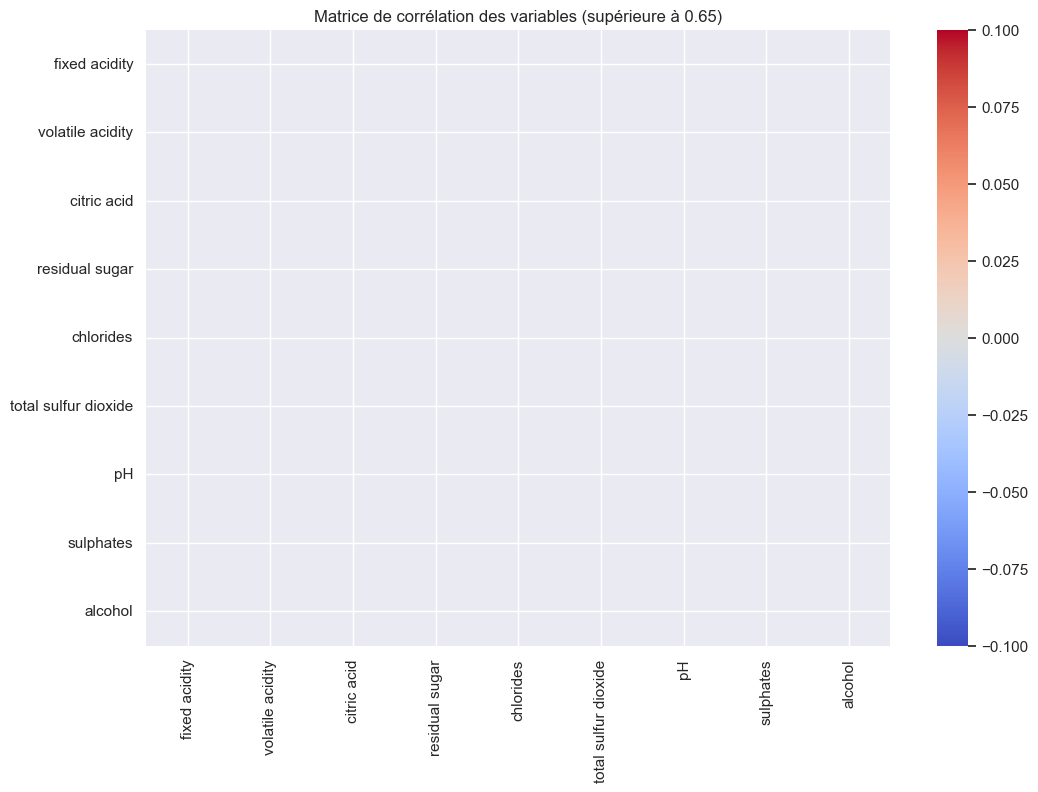

In [39]:
# Seuil de 0.60
threshold = 0.60
correlation_matrix_high = np.where(np.triu(np.abs(correlation_matrix) > threshold, k=1), correlation_matrix, np.nan)

# Créer un DataFrame avec la matrice modifiée
correlation_df_high = pd.DataFrame(correlation_matrix_high, columns=correlation_matrix.columns, index=correlation_matrix.index)

# Affichage de la matrice modifiée avec les noms de variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df_high, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables (supérieure à 0.65)')
plt.show()


Il n'y a plus de problèmes de multicolinéarité entre les features de notre base, nous pouvons passer à la préparation des données.

# B . Préparation des données

## I - Format des variables

In [41]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   pH                    6488 non-null   float64
 8   sulphates             6493 non-null   float64
 9   alcohol               6497 non-null   float64
 10  quality               6497 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 558.5+ KB


Il est donc important de passer les deux variable en catégorielle, afin de les recoder au bon format.

Dans cette analyse nous allons mettre les deux variables target en catégorielle : 

In [44]:
wine2['quality'] = wine2['quality'].astype('category')

wine2['type'] = wine2['type'].astype('category')

In [45]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   category
 1   fixed acidity         6487 non-null   float64 
 2   volatile acidity      6489 non-null   float64 
 3   citric acid           6494 non-null   float64 
 4   residual sugar        6495 non-null   float64 
 5   chlorides             6495 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   pH                    6488 non-null   float64 
 8   sulphates             6493 non-null   float64 
 9   alcohol               6497 non-null   float64 
 10  quality               6497 non-null   category
dtypes: category(2), float64(9)
memory usage: 470.1 KB


*Les autres variables sont au bon format*

## II - Identification des NA 

In [46]:
na_count = wine2.isna().sum()/wine2.shape[0]*100  # Calcul du % de NA dans chaque variable

na = wine2.isna().sum()/wine2.shape[0]*100
na.sort_values()

type                    0.000000
total sulfur dioxide    0.000000
alcohol                 0.000000
quality                 0.000000
residual sugar          0.030783
chlorides               0.030783
citric acid             0.046175
sulphates               0.061567
volatile acidity        0.123134
pH                      0.138525
fixed acidity           0.153917
dtype: float64

In [48]:
wine2.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
total sulfur dioxide     0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Le nombre de valeurs manquantes est très faible donc il sera mieux de simplement les supprimer. Une imputation par la moyenne et la médiane aurait pu être réaliser mais cela n'est pas indispensable en raison du nombre faible na dans notre data set.

**Gestion des valeurs manquantes**

- Suppresion des lignes ayant des NA

In [60]:
wine_noNA = wine2.dropna()

In [61]:
wine_noNA.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Le nombre de valeurs manquantes est très faible donc il sera mieux de simplement les supprimer. Une imputation par la moyenne et la médiane aurait pu être réaliser mais cela n'est pas indispensable en raison du nombre faible na dans notre data set.

## III - Outliers

Expliquer l'objectif des graphiques 

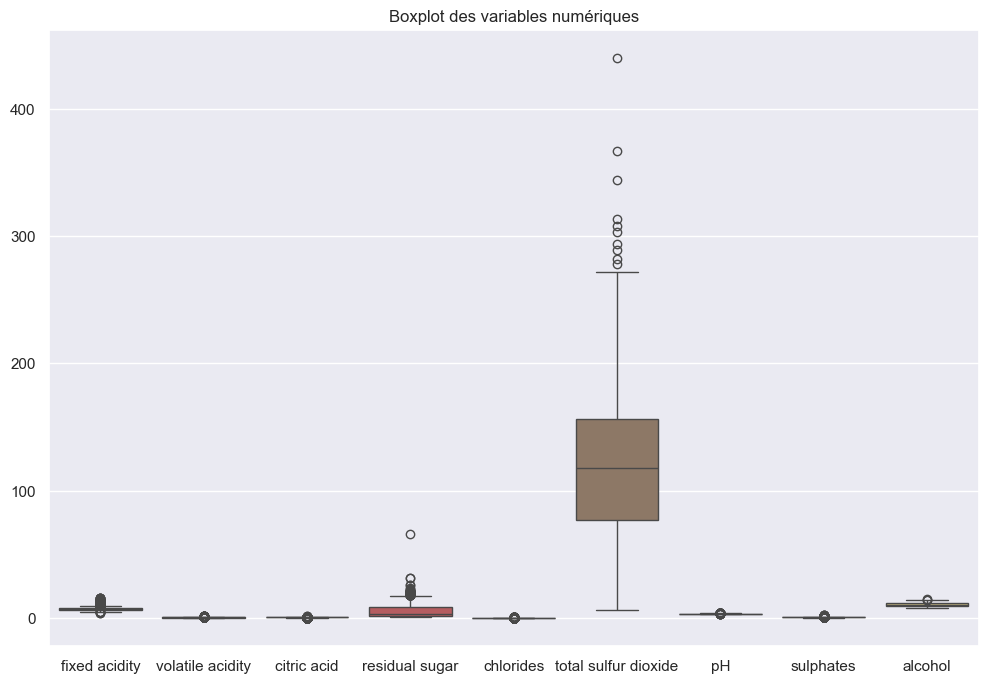

In [62]:
# Sélectionner les colonnes numériques
numeric_columns = wine_noNA.select_dtypes(include=['float64']).columns

# Créer des boxplots pour les colonnes numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine_noNA[numeric_columns])
plt.title('Boxplot des variables numériques')
plt.show()

*On observe des valeurs atypiques sur quasiment chaque variables quanti, nous allons donc regarder les valeurs atypiques par variables ayant des échelles comparables.*

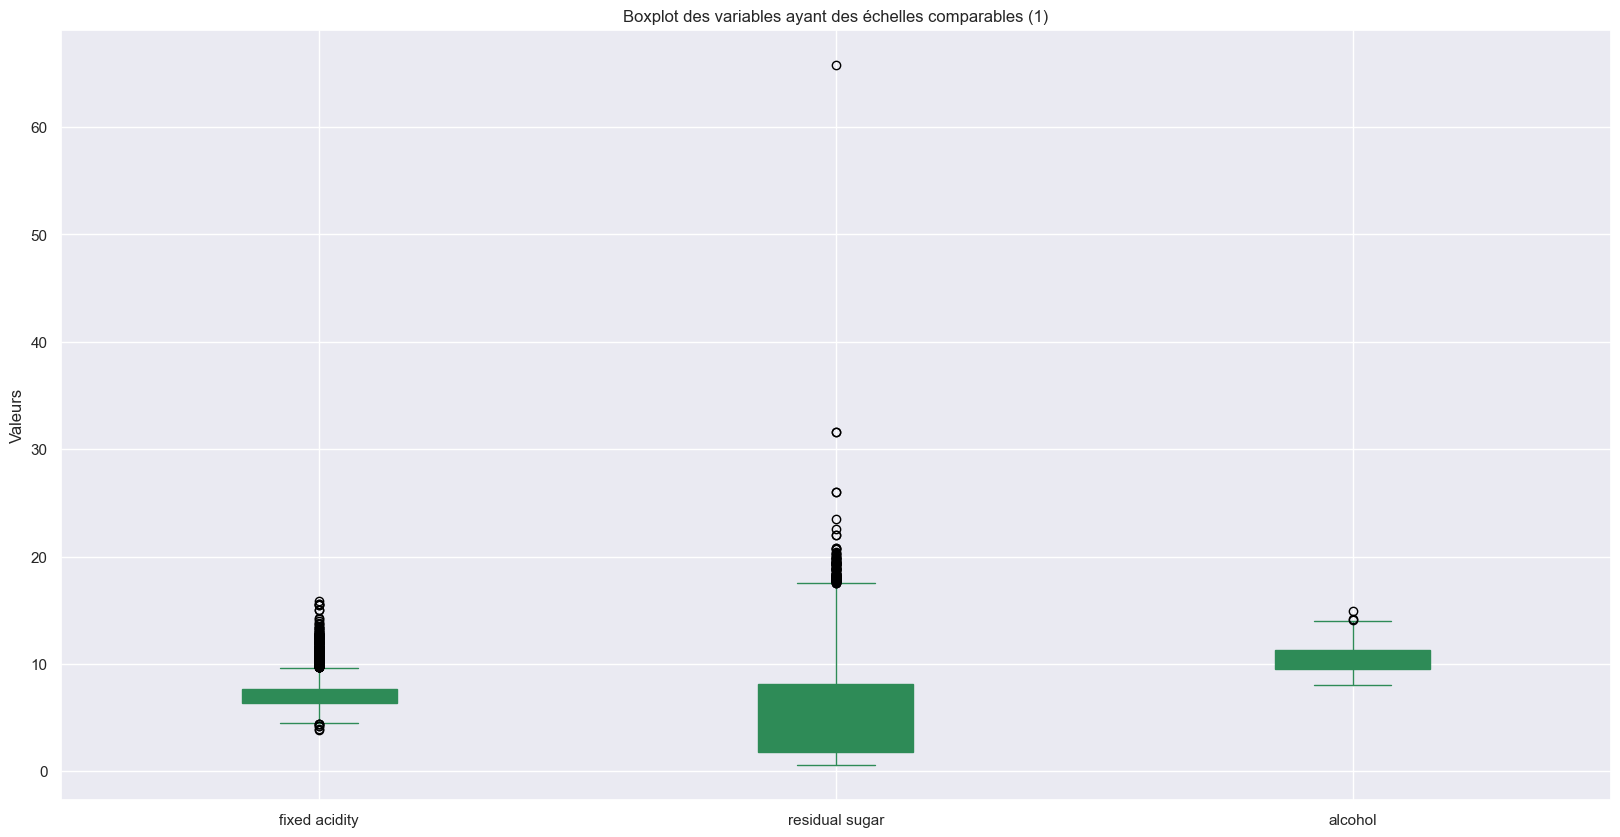

In [80]:
col_treat1 = ['fixed acidity','residual sugar','alcohol']
df_selected1 = wine_noNA[col_treat1]

# Tracber le boxplot avec la couleur bleu foncé
plt.figure(figsize=(20, 10))  # Ajustez la taille de la figure selon vos besoins
boxplot1 = df_selected1.boxplot(color='seagreen', patch_artist=True)

# Ajouter des titres et des étiquettes
plt.title("Boxplot des variables ayant des échelles comparables (1)")
plt.ylabel("Valeurs")

# Afficher le boxplot
plt.show()

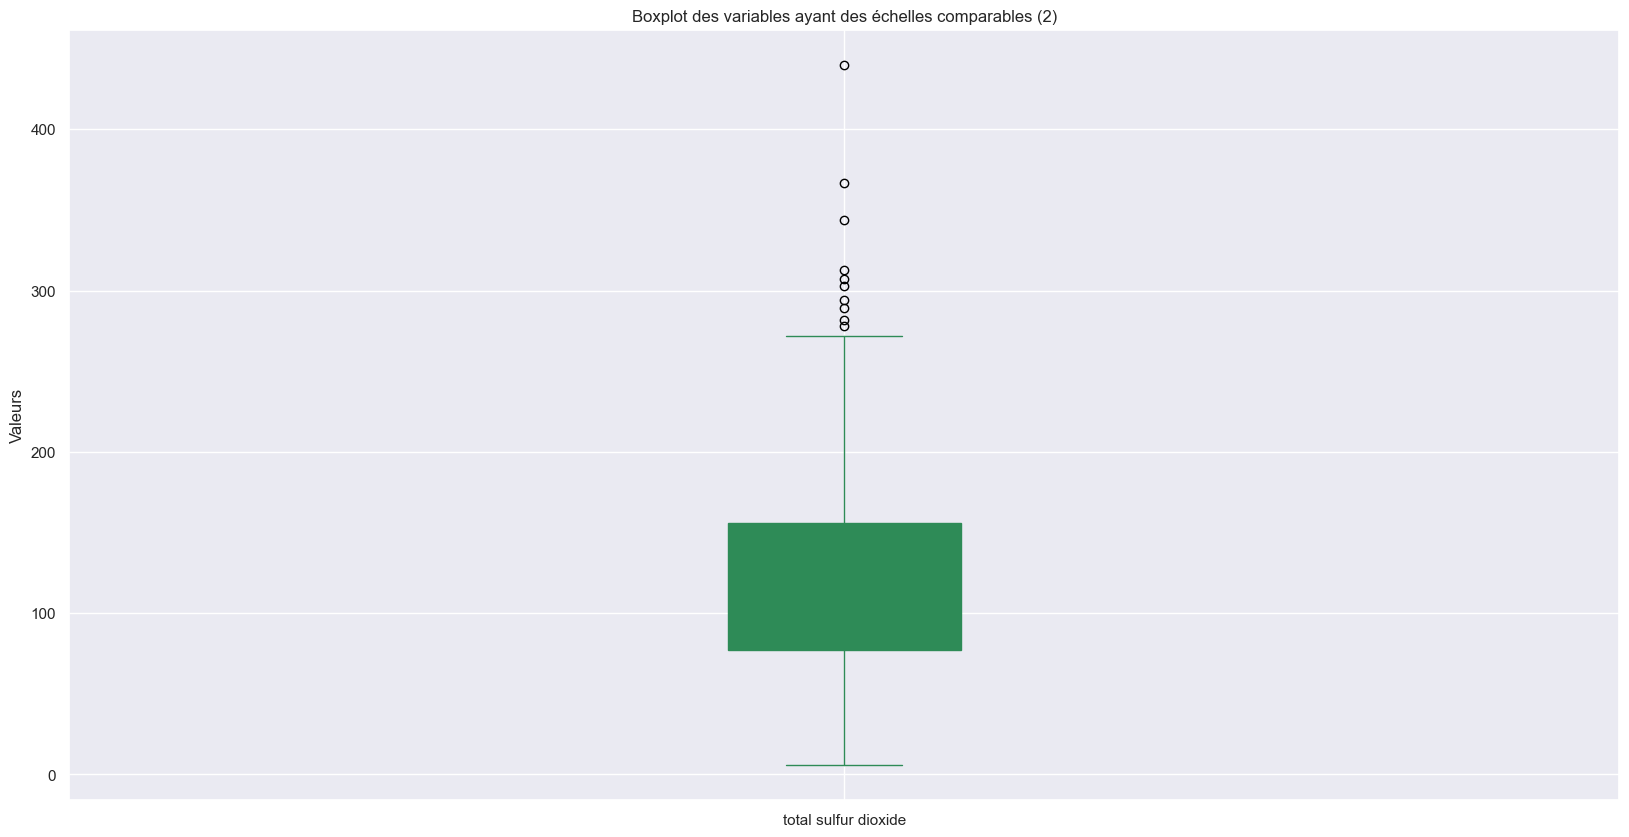

In [74]:
col_treat2 = ['total sulfur dioxide']
df_selected2 = wine_noNA[col_treat2]

# Tracber le boxplot avec la couleur bleu foncé
plt.figure(figsize=(20, 10))  # Ajustez la taille de la figure selon vos besoins
boxplot2 = df_selected2.boxplot(color='seagreen', patch_artist=True)

# Ajouter des titres et des étiquettes
plt.title("Boxplot des variables ayant des échelles comparables (2)")
plt.ylabel("Valeurs")

# Afficher le boxplot
plt.show()

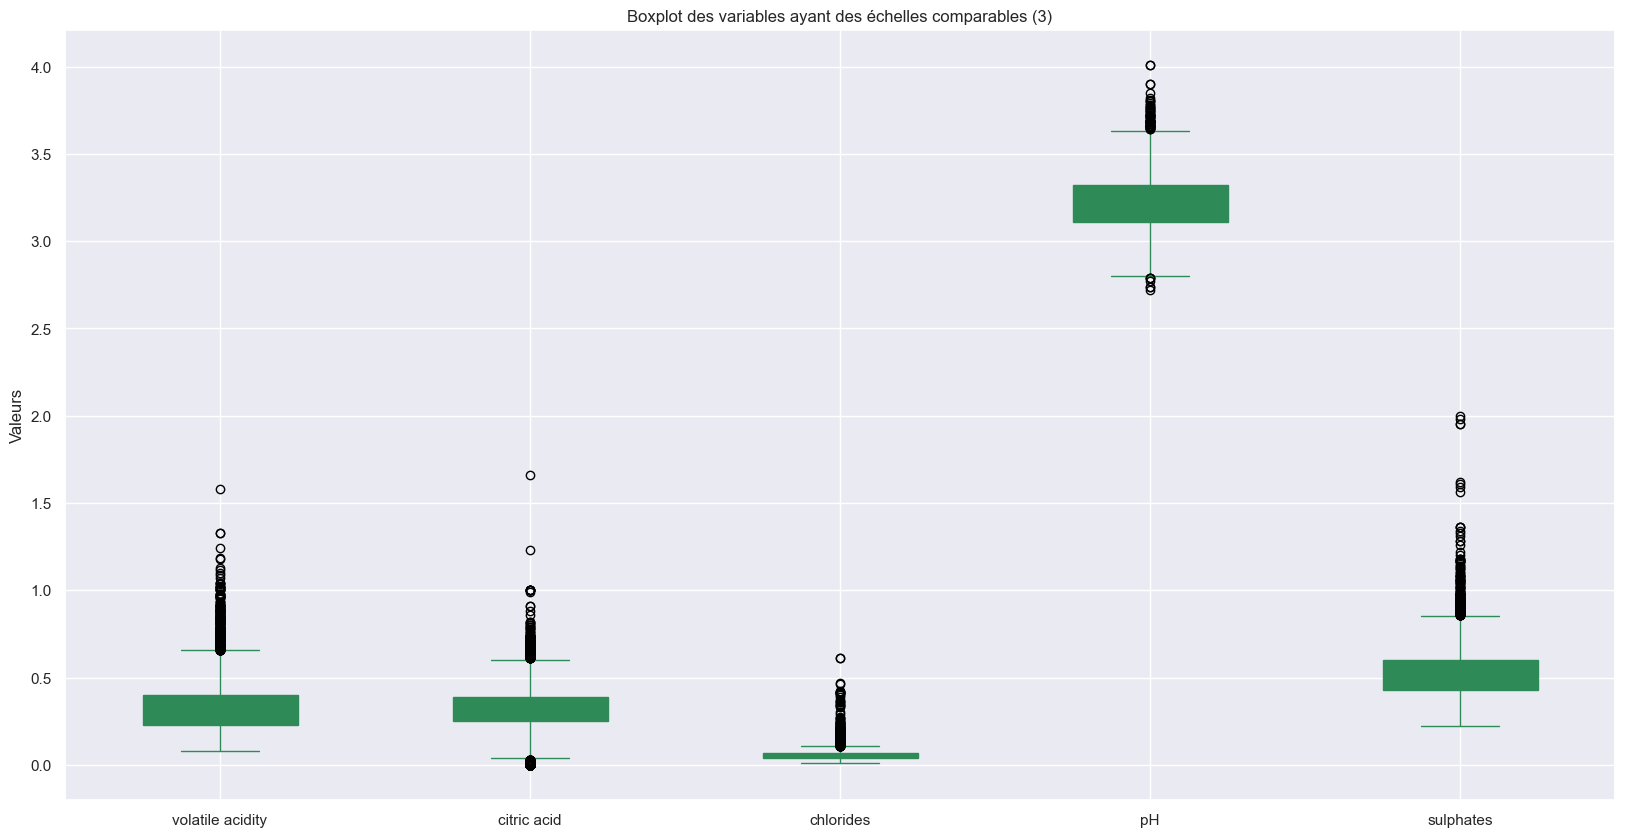

In [82]:
col_treat3 = ['volatile acidity','citric acid','chlorides','pH','sulphates']
df_selected3 = wine_noNA[col_treat3]

# Tracber le boxplot avec la couleur bleu foncé
plt.figure(figsize=(20, 10))  # Ajustez la taille de la figure selon vos besoins
boxplot3 = df_selected3.boxplot(color='seagreen', patch_artist=True)

# Ajouter des titres et des étiquettes
plt.title("Boxplot des variables ayant des échelles comparables (3)")
plt.ylabel("Valeurs")

# Afficher le boxplot
plt.show()

Nous observons que chaque variables quanti contient des valeurs atypiques, il faut donc les traiter. 

Ces outliers pourrait biaiser notre analyse.

Box plot (1) : alcool - de 10 valeurs aberrantes.

Box plot (2) : 10 valeurs aberrantes.

Box plot (3) : + de 10 valeurs aberrantes pour chaque variables

In [957]:
col_to_treat = ['volatile acidity', 'citric acid', 'chlorides', 'pH', 'sulphates', 'fixed acidity', 'residual sugar', 'alcohol', 'total sulfur dioxide']

# Copier le DataFrame original pour éviter de modifier les données d'origine
wine_noOutliers = wine_noNA.copy()

# Boucle sur les colonnes spécifiées
for column in col_to_treat:
    # Calcul des Z-scores pour chaque point de données
    z_scores = zscore(wine_noOutliers [column])
    
    # Définir un seuil pour considérer un point comme une valeur atypique (par exemple, Z-score > 3)
    threshold = 3
    
    # Filtrer les valeurs atypiques en fonction des Z-scores
    wine_noOutliers  = wine_noOutliers [(z_scores <= threshold) & (z_scores >= -threshold)]

# Afficher le DataFrame sans les valeurs atypiques
print(wine_noOutliers)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
5     white            8.1             0.280         0.40             6.9   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  total sulfur dioxide    pH  sulphates  alcohol quality  
1

**Vérification sur les boxplot**

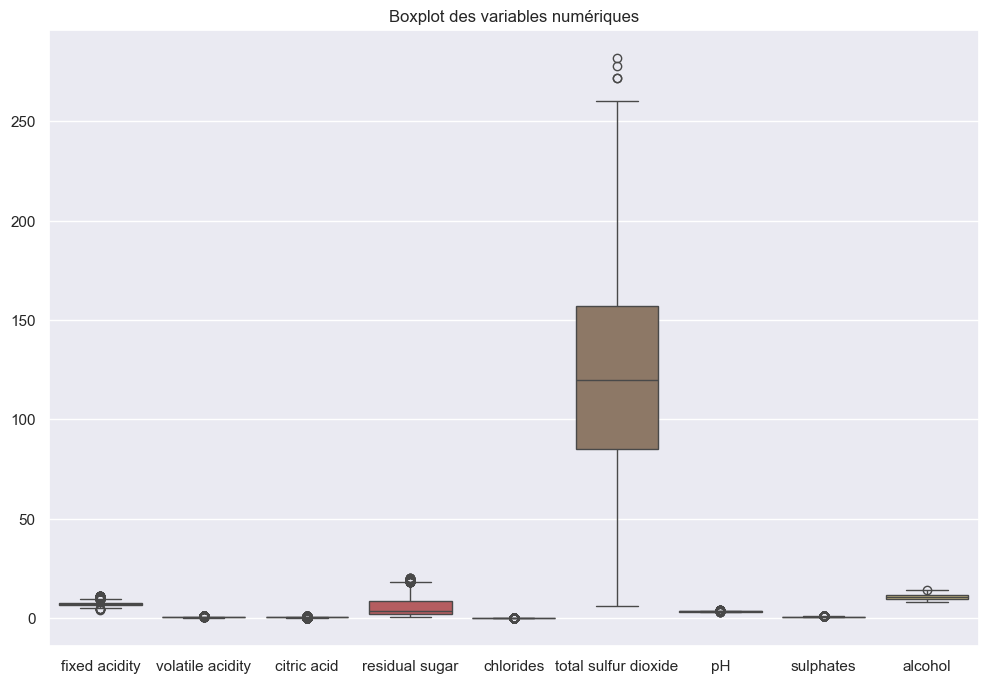

In [507]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine_noOutliers[numeric_columns])
plt.title('Boxplot des variables numériques')
plt.show()

*Le graphique montre que les outliers ont bien été traités. Nous pouvons donc continuer notre analyse.*

Il est bon de rappeler que les points en dehors de la boite à moustache ne sont pas tous des points atypiques. 

# C. Modélisation de la target quality

In [958]:
wine_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5978 non-null   category
 1   fixed acidity         5978 non-null   float64 
 2   volatile acidity      5978 non-null   float64 
 3   citric acid           5978 non-null   float64 
 4   residual sugar        5978 non-null   float64 
 5   chlorides             5978 non-null   float64 
 6   total sulfur dioxide  5978 non-null   float64 
 7   pH                    5978 non-null   float64 
 8   sulphates             5978 non-null   float64 
 9   alcohol               5978 non-null   float64 
 10  quality               5978 non-null   category
dtypes: category(2), float64(9)
memory usage: 479.2 KB


In [959]:
quality_model = wine_noOutliers # Je renomme ma base  

In [960]:
quality_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5978 non-null   category
 1   fixed acidity         5978 non-null   float64 
 2   volatile acidity      5978 non-null   float64 
 3   citric acid           5978 non-null   float64 
 4   residual sugar        5978 non-null   float64 
 5   chlorides             5978 non-null   float64 
 6   total sulfur dioxide  5978 non-null   float64 
 7   pH                    5978 non-null   float64 
 8   sulphates             5978 non-null   float64 
 9   alcohol               5978 non-null   float64 
 10  quality               5978 non-null   category
dtypes: category(2), float64(9)
memory usage: 479.2 KB


    À présent, nous allons effectuer la modélisation sur notre variable quality

Ceci se fera en 2 parties: 
- 1 : Préparation des données. *Comme elle est différente pour chaque target, nous devons effectuer une préparation finale des données pour chaque target.*
- 2 : Modèles. *Des modèles multiclass seront utilisées. 2 modèles SVM : OVO & OVR. Puis un réseaux de neurones.*

## I. Préparation finale des données 

Les dernières étapes se font en deux grandes parties, une préparation des données sur la target 'quality' et une sur la target 'type'

### 1 ) Recodage 

In [961]:
quality_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5978 non-null   category
 1   fixed acidity         5978 non-null   float64 
 2   volatile acidity      5978 non-null   float64 
 3   citric acid           5978 non-null   float64 
 4   residual sugar        5978 non-null   float64 
 5   chlorides             5978 non-null   float64 
 6   total sulfur dioxide  5978 non-null   float64 
 7   pH                    5978 non-null   float64 
 8   sulphates             5978 non-null   float64 
 9   alcohol               5978 non-null   float64 
 10  quality               5978 non-null   category
dtypes: category(2), float64(9)
memory usage: 479.2 KB


**Variable quality (target)**

In [962]:
quality_model['quality'] = quality_model['quality'].cat.codes

Encodage ordinal. Avec la fonction cat.codes de pandas pour assigner des codes numériques aux différentes catégories

**Variable 'type**

In [963]:
quality_model= pd.get_dummies(quality_model, columns=['type'], drop_first=False)

Encodage binaire avec one-hot

In [964]:
quality_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5978 non-null   float64
 1   volatile acidity      5978 non-null   float64
 2   citric acid           5978 non-null   float64
 3   residual sugar        5978 non-null   float64
 4   chlorides             5978 non-null   float64
 5   total sulfur dioxide  5978 non-null   float64
 6   pH                    5978 non-null   float64
 7   sulphates             5978 non-null   float64
 8   alcohol               5978 non-null   float64
 9   quality               5978 non-null   int8   
 10  type_red              5978 non-null   bool   
 11  type_white            5978 non-null   bool   
dtypes: bool(2), float64(9), int8(1)
memory usage: 484.5 KB


In [965]:
quality_model.quality.value_counts()


quality
3    2619
2    1948
4    1018
5     187
1     184
0      17
6       5
Name: count, dtype: int64

In [966]:
quality_model.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,type_red,type_white
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,3,False,True
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,3,False,True
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,3,False,True
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,3,False,True
5,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,3,False,True


Le format des variables est le bon.

### 2 )  Split

In [967]:
# Séparer les features et la target
X = quality_model.drop('quality', axis=1)
y =quality_model['quality']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [968]:
# Vérifier les formes des ensembles d'entraînement et de test
print("Forme de X_train:", X_train.shape)
print("Forme de X_test:", X_test.shape)
print("Forme de y_train:", y_train.shape)
print("Forme de y_test:", y_test.shape)

Forme de X_train: (4782, 11)
Forme de X_test: (1196, 11)
Forme de y_train: (4782,)
Forme de y_test: (1196,)


### 3 ) Rééquilibrage

In [970]:


# Utilisez RandomOverSampler pour suréchantillonner les classes minoritaires pour les caractéristiques uniquement
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Vérifiez les dimensions après le suréchantillonnage
print(X_resampled.shape)
print(y_resampled.shape)


(14665, 11)
(14665,)


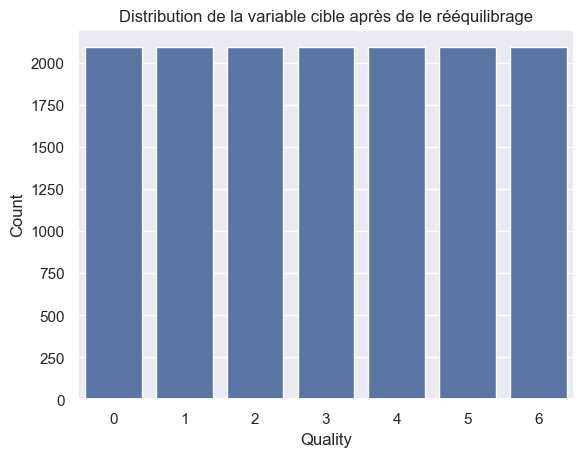

In [971]:
# Afficher l'histogramme de la variable cible
# Utiliser seaborn pour un diagramme en barres
sns.countplot(x=y_resampled)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution de la variable cible après de le rééquilibrage')
plt.show()

### 4 ) Standardization

In [972]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_resampled)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

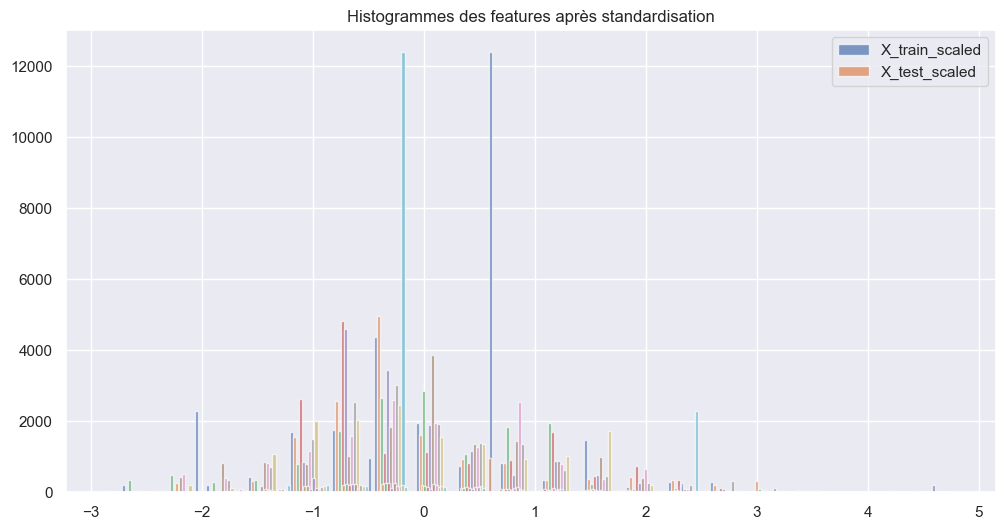

In [973]:
# Visualiser les distributions après standardisation
plt.figure(figsize=(12, 6))
plt.title('Histogrammes des features après standardisation')
plt.hist(X_train_scaled, bins=20, alpha=0.7, label='X_train_scaled')
plt.hist(X_test_scaled, bins=20, alpha=0.7, label='X_test_scaled')
plt.legend()
plt.show()

## II. Modèles 

### 1 ) SVM multiclass : OVO & OVR 

    OVO

In [752]:
# Initiation du modèle OVO
svm_model = SVC(random_state=42)

OVO_SVC = OneVsOneClassifier(svm_model)

In [555]:
# Entrainer le modèle 
OVO_SVC.fit(X_train_scaled, y_resampled)

OneVsOneClassifier(estimator=SVC(random_state=42))

    OVR

In [556]:
# Initiation du modèle OVR
svm_model = SVC(random_state=42)

# Initialiser le classifieur OvR avec SVM
OVR_SVC = OneVsRestClassifier(svm_model)

In [557]:
OVR_SVC.fit(X_train_scaled, y_resampled)

OneVsRestClassifier(estimator=SVC(random_state=42))

    Cross_validation 

In [558]:
# Cross validation de 5 basée sur l'accruracy
cvs_c_svc_ovo= cross_val_score(OVO_SVC, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_sc_svc_ovr = cross_val_score(OVR_SVC, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

In [559]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_c_svc_ovo,cvs_sc_svc_ovr]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])

df_cross['Model'] = ['OVO','OVR']

In [560]:
df_cross

,fold1,fold2,fold3,fold4,fold5,Model
0,0.713263,0.710876,0.734402,0.713945,0.715309,OVO
1,0.687351,0.703375,0.718718,0.705080,0.710876,OVR


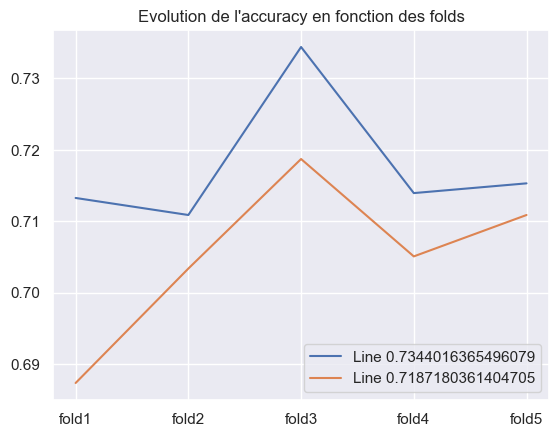

In [561]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:5] ,label='Line '+str(df_cross.iloc[row,2]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [562]:
for i in range(2):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.7175588135015342 et un std : 0.009551408820944081
Le modèle N° 1 a une accuray de 0.7050801227412206 et un std : 0.011584703039912726


Le modèle OVO est > au modèle OVR. Son niveau de performance (selon l'accuracy) est meilleur, puis son ecart-type est plus faible.

Nous allons regarder plus précisement les performances des modèles.

    Performance des modèles

*Sur l'échantillon test*

In [564]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Prédiction sur l'ensemble de test
y_pred_ovo = OVO_SVC.predict(X_test_scaled)
y_pred_ovr = OVR_SVC.predict(X_test_scaled)

# Calcul des métriques pour OVO
precision_ovo, recall_ovo, f1_ovo, _ = precision_recall_fscore_support(y_test, y_pred_ovo, average='weighted')
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Calcul des métriques pour OVR
precision_ovr, recall_ovr, f1_ovr, _ = precision_recall_fscore_support(y_test, y_pred_ovr, average='weighted')
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [565]:
# Affichage des résultats pour OVO
print("Métriques pour OVO:")
print(f"Précision: {precision_ovo:.4f}")
print(f"Rappel: {recall_ovo:.4f}")
print(f"F1-score: {f1_ovo:.4f}")
print(f"Accuracy: {accuracy_ovo:.4f}\n")

Métriques pour OVO:
Précision: 0.5515
Rappel: 0.4423
F1-score: 0.4657
Accuracy: 0.4423



In [566]:
# Affichage des résultats pour OVR
print("Métriques pour OVR:")
print(f"Précision: {precision_ovr:.4f}")
print(f"Rappel: {recall_ovr:.4f}")
print(f"F1-score: {f1_ovr:.4f}")
print(f"Accuracy: {accuracy_ovr:.4f}")

Métriques pour OVR:
Précision: 0.5188
Rappel: 0.3562
F1-score: 0.3698
Accuracy: 0.3562


*Sur l'echantillon train*

In [1009]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Prédiction sur l'ensemble d'entraînement
y_pred_train_ovo = OVO_SVC.predict(X_train_scaled)
y_pred_train_ovr = OVR_SVC.predict(X_train_scaled)

# Calcul des métriques pour OVO sur l'ensemble d'entraînement
precision_train_ovo, recall_train_ovo, f1_train_ovo, _ = precision_recall_fscore_support(y_resampled, y_pred_train_ovo, average='weighted')
accuracy_train_ovo = accuracy_score(y_resampled, y_pred_train_ovo)

# Calcul des métriques pour OVR sur l'ensemble d'entraînement
precision_train_ovr, recall_train_ovr, f1_train_ovr, _ = precision_recall_fscore_support(y_resampled, y_pred_train_ovr, average='weighted')
accuracy_train_ovr = accuracy_score(y_resampled, y_pred_train_ovr)



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/chaigneelliot/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/nl/9lfy6hms1wbbvw2cf0y644_w0000gn/T/ipykernel_912/1020868628.py", line 4, in <module>
    y_pred_train_ovo = OVO_SVC.predict(X_train_scaled)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/multiclass.py", line 808, in predict
    self.estimator,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/multiclass.py", line 836, in decision_function
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1461, in check_is_fitted
sklearn.exceptions.NotFittedError: This OneVsOneClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

During handling of

In [590]:
# Affichage des résultats pour OVO sur l'ensemble d'entraînement
print("Métriques pour OVO sur l'ensemble d'entraînement:")
print(f"Précision : {precision_train_ovo:.4f}")
print(f"Rappel : {recall_train_ovo:.4f}")
print(f"F1-score : {f1_train_ovo:.4f}")
print(f"Accuracy : {accuracy_train_ovo:.4f}\n")

Métriques pour OVO sur l'ensemble d'entraînement:
Précision : 0.7380
Rappel : 0.7441
F1-score : 0.7380
Accuracy : 0.7441



In [591]:
# Affichage des résultats pour OVR sur l'ensemble d'entraînement
print("Métriques pour OVR sur l'ensemble d'entraînement:")
print(f"Précision : {precision_train_ovr:.4f}")
print(f"Rappel : {recall_train_ovr:.4f}")
print(f"F1-score : {f1_train_ovr:.4f}")
print(f"Accuracy : {accuracy_train_ovr:.4f}")

Métriques pour OVR sur l'ensemble d'entraînement:
Précision : 0.7222
Rappel : 0.7302
F1-score : 0.7072
Accuracy : 0.7302


Nous pouvons conclure que le modèle OVO est plus précis que le modèle OVR.

Ensuite, nous avons calculer nos métriques sur l'échantillon test, puis nous nous sommes rendu compte que sur l'echantillon train, les résultats étaient meilleurs. Cependant, il est plus pertinent d'analyser la prédiction sur l'echantillon test (pour éviter le surajustement). Comme nous avons fait le rééquilibrage seulement sur l'echantillon train cela peut expliquer les moins bons résultats sur l'echantillon test.

Ce qui est intéressant c'est que les résultats donnent la même conclusion, le modèle OVO est meilleur que le modèle OVR. 

### 2 ) Réseaux de neurones

    Initier les modèles

In [1011]:
# initier le modèle
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train_scaled.shape[1]))  # Couche d'entrée 
model.add(Dense(6, activation='relu')) # 2ème couche
model.add(Dense(7, activation='softmax'))
# Compiler le modèle avec la perte appropriée
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [1012]:
model.summary()

Model: "sequential_269"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_642 (Dense)               │ (None, 11)                │        132 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_643 (Dense)               │ (None, 6)                 │         72 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_644 (Dense)               │ (None, 7)                 │         49 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

Nous avons mit autant de neurones dans notre première couche que nous avons de features dans notre modèles.
Cela permet de traiter notre ensemble de données qui est complexe, en réalisant nos modèles, nous nous sommes rendu compte qu nous avions des motifs non linéaires. Donc avoir un nombre égal de neurones dans la couche d'entrée peut aider le réseau à capturer ces nuances.

Nous avons ensuite décidé de mettre la moitié de neurones dans la deuxième couche.

Nous avons spécifié la couche de sortie avec la fonction d'activation 'softmax' quo est adpaté à nos données à prédire.

    Cross_val

In [1013]:
val_model = model.fit(X_train_scaled, y_resampled, epochs=15,validation_data=(X_test_scaled, y_test))

Epoch 1/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2378 - loss: 1.8723 - val_accuracy: 0.1028 - val_loss: 1.9415
Epoch 2/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3616 - loss: 1.5568 - val_accuracy: 0.2115 - val_loss: 1.7787
Epoch 3/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4374 - loss: 1.3553 - val_accuracy: 0.2082 - val_loss: 1.6755
Epoch 4/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4619 - loss: 1.2531 - val_accuracy: 0.2642 - val_loss: 1.6212
Epoch 5/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5046 - loss: 1.1979 - val_accuracy: 0.3035 - val_loss: 1.5853
Epoch 6/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5128 - loss: 1.1575 - val_accuracy: 0.3219 - val_loss: 1.5628
Epoch 7/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5211 - loss: 1.1286 - val_accuracy: 0.3445 - val_loss: 1.5449
Epoch 8/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5287 - loss: 1.1065 - val_accuracy: 0.

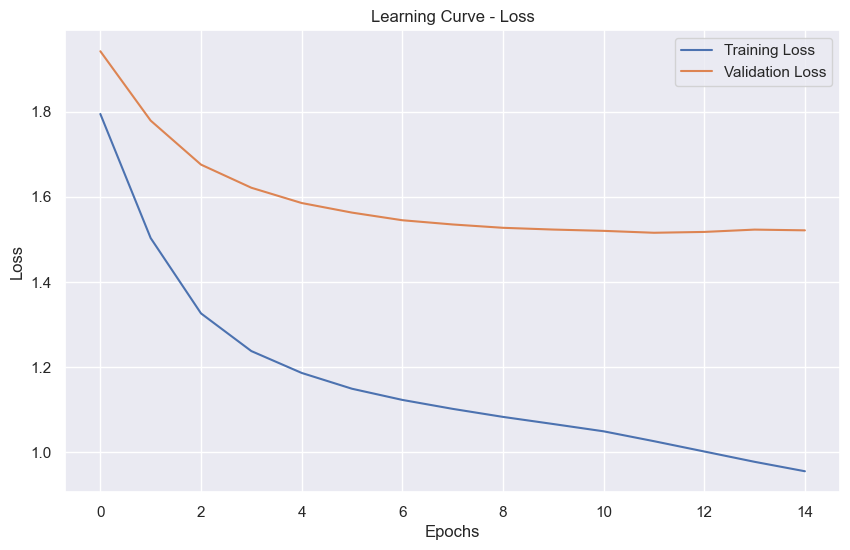

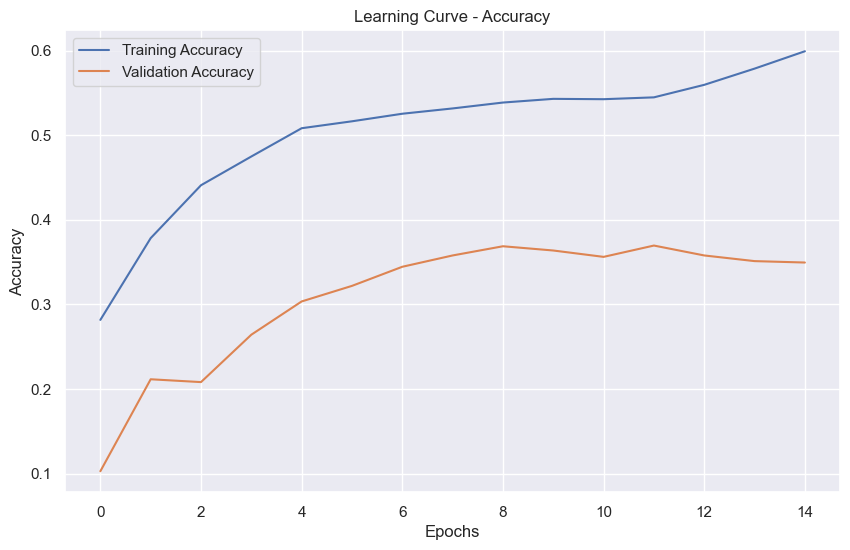

In [1014]:
# Affichez les courbes d'apprentissage
history = val_model.history
df_history = pd.DataFrame(history)

# Plot de la perte (loss) pour l'entraînement et la validation
plt.figure(figsize=(10, 6))
plt.plot(df_history['loss'], label='Training Loss')
plt.plot(df_history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot de la précision (accuracy) pour l'entraînement et la validation
plt.figure(figsize=(10, 6))
plt.plot(df_history['accuracy'], label='Training Accuracy')
plt.plot(df_history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Courbe d'apprentissage de la fonction de perte :**
- Les courbes ne sont pas proches.
- La courbe de l'ensemble d'entrainement a une perte inférieur à la courbe de l'ensemble de validation.
- On parle donc de overfitting, sur-ajustement


**Courbe d'apprentissage de la précision du modèle :**
- Les courbes ne sont pas proches.
- La courbe de l'ensemble d'entrainement a une accuracy supérieur a la courbe de l'ensemble de test.
- On parle donc de overfitting, sur-ajustement

    Perfomance du modèle

*L'echantillon test*

In [1015]:
# Évaluation sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Convertir les prédictions en classes (argmax pour obtenir la classe prédite)
y_pred_classes = np.argmax(y_pred, axis=1)

# Importer des métriques spécifiques pour la classification multiclasse
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculer et afficher différentes métriques
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes)}')
print(f'Macro Precision: {precision_score(y_test, y_pred_classes, average="macro")}')
print(f'Macro Recall: {recall_score(y_test, y_pred_classes, average="macro")}')
print(f'Macro F1 Score: {f1_score(y_test, y_pred_classes, average="macro")}')

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f'Confusion Matrix:\n{conf_matrix}')

38/38 - 0s - 3ms/step - accuracy: 0.3495 - loss: 1.5212
Loss: 1.5212490558624268, Accuracy: 0.34949833154678345
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.3494983277591973
Macro Precision: 0.22620286636999357
Macro Recall: 0.282689311837693
Macro F1 Score: 0.20474419909281646
Confusion Matrix:
[[  0   3   0   0   1   2   0]
 [  1  17  10   3   1   0   0]
 [ 21 111 181  73  13  13   0]
 [ 23  59 101 164  89  87   1]
 [  3   5  19  37  38  80   0]
 [  0   2   0  10   7  18   0]
 [  0   0   0   0   0   3   0]]


*L'echantillon train*

In [1016]:
# Évaluation sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_resampled, verbose=2)
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

# Prédictions sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train_scaled)

# Convertir les prédictions en classes (argmax pour obtenir la classe prédite)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Calculer et afficher différentes métriques pour l'ensemble d'entraînement
print(f'Train Accuracy: {accuracy_score(y_resampled, y_train_pred_classes)}')
print(f'Train Macro Precision: {precision_score(y_resampled, y_train_pred_classes, average="macro")}')
print(f'Train Macro Recall: {recall_score(y_resampled, y_train_pred_classes, average="macro")}')
print(f'Train Macro F1 Score: {f1_score(y_resampled, y_train_pred_classes, average="macro")}')

# Matrice de confusion pour l'ensemble d'entraînement
train_conf_matrix = confusion_matrix(y_resampled, y_train_pred_classes)
print(f'Train Confusion Matrix:\n{train_conf_matrix}')

459/459 - 1s - 2ms/step - accuracy: 0.6048 - loss: 0.9433
Train Loss: 0.9432723522186279, Train Accuracy: 0.6048414707183838
459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Train Accuracy: 0.6048414592567337
Train Macro Precision: 0.5929247056200523
Train Macro Recall: 0.6048414592567337
Train Macro F1 Score: 0.5958201531330742
Train Confusion Matrix:
[[2095    0    0    0    0    0    0]
 [  64 1173  491  300   19   48    0]
 [ 132  496  944  381   71   67    4]
 [  96  215  461  657  325  336    5]
 [   8   75  124  448  615  823    2]
 [   0   39   52  268  435 1291   10]
 [   0    0    0    0    0    0 2095]]


Le réseaux de neurones a lui des moins bonnes performances que les modèles SVM

# D. Modélisation de la target type

## I. Préparation finale des données

In [611]:
wine_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5978 non-null   category
 1   fixed acidity         5978 non-null   float64 
 2   volatile acidity      5978 non-null   float64 
 3   citric acid           5978 non-null   float64 
 4   residual sugar        5978 non-null   float64 
 5   chlorides             5978 non-null   float64 
 6   total sulfur dioxide  5978 non-null   float64 
 7   pH                    5978 non-null   float64 
 8   sulphates             5978 non-null   float64 
 9   alcohol               5978 non-null   float64 
 10  quality               5978 non-null   int8    
dtypes: category(1), float64(9), int8(1)
memory usage: 478.8 KB


In [612]:
type_model = wine_noOutliers # Je renomme ma base pour que cela soit pas simple.

### 1 ) Recodage 

In [613]:
# Créer un encodeur de labels
label_encoder = LabelEncoder()

# Appliquer l'encodage sur la variable cible "type"
type_model['type_encoded'] = label_encoder.fit_transform(type_model['type'])

# Afficher les correspondances entre les classes originales et les codes
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'red': 0, 'white': 1}


La variable type est binaire, soit nous avons des rouges ou soit nous avons des blancs.

Lorsque le vin est blanc, la variable est égale à 1, autrement elle prend la valeur 0.

Il est nécessaire la réquilibrée 

In [614]:
# Utiliser la fonction get_dummies de pandas pour l'encodage one-hot
df_quality_encoded = pd.get_dummies(type_model['quality'], prefix='quality')

# Joindre le nouveau DataFrame encodé avec le DataFrame d'origine
type_model = pd.concat([type_model, df_quality_encoded], axis=1)

# Supprimer la colonne d'origine "quality"
type_model = type_model.drop('quality', axis=1)


In [615]:
type_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 1 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5978 non-null   category
 1   fixed acidity         5978 non-null   float64 
 2   volatile acidity      5978 non-null   float64 
 3   citric acid           5978 non-null   float64 
 4   residual sugar        5978 non-null   float64 
 5   chlorides             5978 non-null   float64 
 6   total sulfur dioxide  5978 non-null   float64 
 7   pH                    5978 non-null   float64 
 8   sulphates             5978 non-null   float64 
 9   alcohol               5978 non-null   float64 
 10  type_encoded          5978 non-null   int64   
 11  quality_0             5978 non-null   bool    
 12  quality_1             5978 non-null   bool    
 13  quality_2             5978 non-null   bool    
 14  quality_3             5978 non-null   bool    
 15  quality_4

### 2 ) Split

In [754]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la variable cible (y)
X = type_model.drop(['type', 'type_encoded'], axis=1)
y = type_model['type_encoded']

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les dimensions des ensembles d'entraînement et de test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (4782, 16)
X_test shape: (1196, 16)
y_train shape: (4782,)
y_test shape: (1196,)


### 3 ) Rééquilibrage 

In [755]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Utilisez RandomOverSampler pour suréchantillonner les classes minoritaires pour les caractéristiques uniquement
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Vérifiez les dimensions après le suréchantillonnage
print(X_resampled.shape)
print(y_resampled.shape)

(7562, 16)
(7562,)


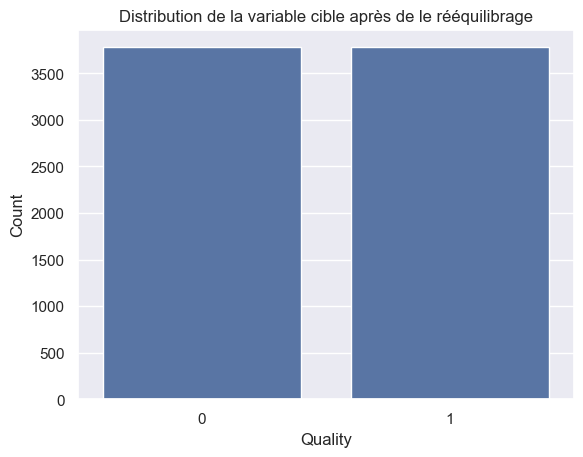

In [756]:
# Afficher l'histogramme de la variable cible
# Utiliser seaborn pour un diagramme en barres
sns.countplot(x=y_resampled)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution de la variable cible après de le rééquilibrage')
plt.show()

### 4 ) Standarization

In [757]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_resampled)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

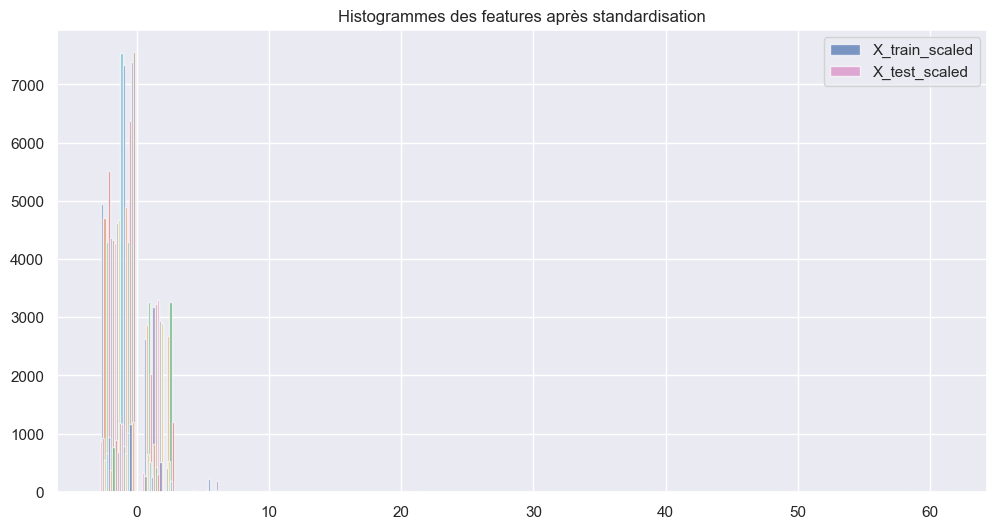

In [758]:
# Visualiser les distributions après standardisation
plt.figure(figsize=(12, 6))
plt.title('Histogrammes des features après standardisation')
plt.hist(X_train_scaled, bins=20, alpha=0.7, label='X_train_scaled')
plt.hist(X_test_scaled, bins=20, alpha=0.7, label='X_test_scaled')
plt.legend()
plt.show()

Les features sont à la même échelle et sont donc comparables dans nos modèles !!

## II. Modèles 

### 1 ) Modèles SVM

    Déclaration des modèles

In [759]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_scaled, y_resampled)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
l_SVC.fit(X_train_scaled, y_resampled)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_scaled,y_resampled)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_scaled, y_resampled)

# SVM avec rbf (noyau radical)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_resampled)

# SVM avec le noyau poly
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train_scaled, y_resampled)

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


SVC(kernel='poly', random_state=42)

    Cross val sur nos modèles

In [760]:
# Get cross_val_score for each function

cvs_lgr = cross_val_score(lgr, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_rbf = cross_val_score(svm_rbf, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

cvs_poly = cross_val_score(svm_poly, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


In [761]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc, cvs_rbf,cvs_poly]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc','rbf','poly']

In [762]:
df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.988103,0.990086,0.990079,0.990741,0.987434,lgr
1,0.988103,0.990086,0.988757,0.991402,0.987434,lsvc
2,0.985459,0.989425,0.990079,0.990741,0.984788,sgdc
3,0.989425,0.990086,0.990741,0.991402,0.988095,svc
4,0.991408,0.994052,0.991402,0.994709,0.990079,rbf
5,0.992069,0.992730,0.991402,0.995370,0.992063,poly


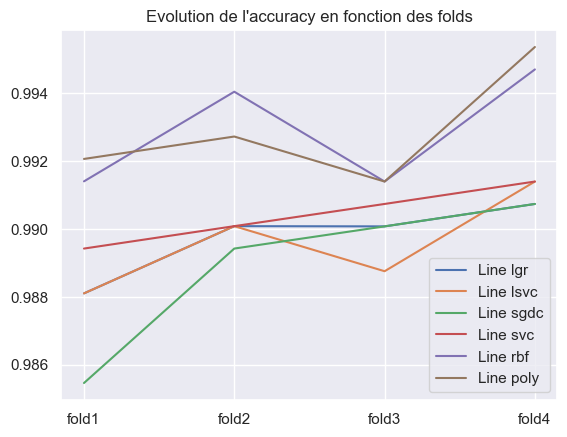

In [763]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [764]:
for i in range(6):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.9892885993348649 et un std : 0.001433107725945217
Le modèle N° 1 a une accuray de 0.9891563242025899 et un std : 0.0015924545038446404
Le modèle N° 2 a une accuray de 0.9880985602730481 et un std : 0.002765273489977155
Le modèle N° 3 a une accuray de 0.989949800144777 et un std : 0.001271630019946524
Le modèle N° 4 a une accuray de 0.9923299656941428 et un std : 0.001962150690119038
Le modèle N° 5 a une accuray de 0.9927268785167002 et un std : 0.0015505065873888573


Les deux modèles les plus perfomants sont les modèles rbf et poly. 

Les modèles sont tous les deux non linéaires. 
Nous allons prendre le modèle poly comme modèle final, il est légerement supérieur en accuracy et inférieur en écart-type.

    Grid search sur le modèle Poly

In [765]:
svm_poly.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [766]:
param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'gamma': [0.01, 0.1, 1]
}

In [767]:
grid_svm_poly = GridSearchCV(svm_poly, param_grid=param_grid, cv=5, return_train_score=True)

In [730]:
take_grid = grid_svm_poly.fit(X_train_scaled, y_resampled)

In [768]:
take_grid.cv_results_

{'mean_fit_time': array([2.34865255, 0.28078322, 0.10131874, 1.46136031, 0.12452412,
        0.10210581, 0.83199024, 0.10842061, 0.10365853, 0.64295435,
        0.10305676, 0.10310359, 0.22298145, 0.10585504, 0.10452924]),
 'std_fit_time': array([0.44894295, 0.10084547, 0.0055317 , 0.01723337, 0.00420905,
        0.0038626 , 0.02203645, 0.0052481 , 0.00622979, 0.01054569,
        0.00392748, 0.00590255, 0.00356315, 0.00657972, 0.00653795]),
 'mean_score_time': array([0.31767302, 0.05001245, 0.01237063, 0.26530442, 0.019314  ,
        0.01215   , 0.1624536 , 0.01434598, 0.01231008, 0.12376761,
        0.01341376, 0.01195445, 0.04308066, 0.01235538, 0.01183085]),
 'std_score_time': array([0.05649459, 0.01435907, 0.00083822, 0.0051894 , 0.00052367,
        0.00055838, 0.00128125, 0.00134462, 0.00058324, 0.00223144,
        0.00090222, 0.0004599 , 0.00339456, 0.00038686, 0.00088761]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 5, 5, 5, 10, 10, 10, 100, 100,
                    

In [769]:
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 10, 'gamma': 0.1}
pour un score de: 0.9949751186367181


    Modélisation sur le meilleure modèle

In [771]:
take_grid.best_params_

{'C': 10, 'gamma': 0.1}

In [772]:
best_svm = SVC(kernel='poly', C = 10, gamma = 0.1, random_state=42)

best_svm.fit(X_train_scaled, y_resampled)

SVC(C=10, gamma=0.1, kernel='poly', random_state=42)

In [773]:
# Faire des prédictions sur l'ensemble de test
y_pred_svc = best_svm.predict(X_test_scaled)

# Évaluer la précision
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy - SVM avec kernel: {accuracy_svc:.4f}")

# Afficher le rapport de classification
print("Classification Report - SVM avec kernel:\n", classification_report(y_test, y_pred_svc))


Accuracy - SVM avec kernel: 0.9916
Classification Report - SVM avec kernel:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       252
           1       0.99      1.00      0.99       944

    accuracy                           0.99      1196
   macro avg       0.99      0.98      0.99      1196
weighted avg       0.99      0.99      0.99      1196



In [774]:
print('Training score: ' + str(best_svm.score(X_train_scaled,y_resampled)), 
      '\n',
      'Test score: ' + str(best_svm.score(X_test_scaled, y_test))
     )

Training score: 0.9994710394075641 
 Test score: 0.9916387959866221


    Influence des features

In [775]:
feature_names = X_train.columns  # Si X_train est un DataFrame pandas avec les noms de colonnes.

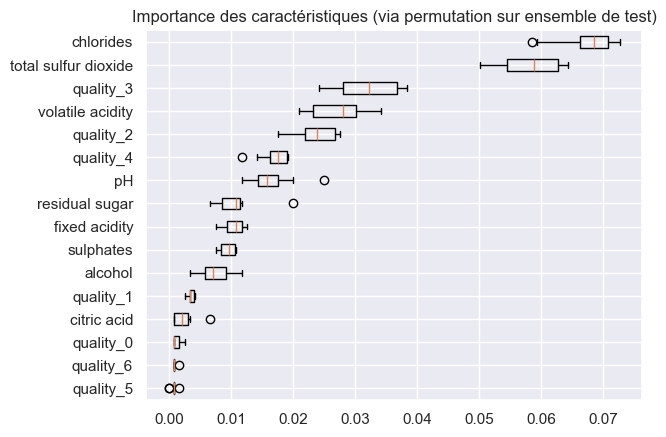

In [776]:
# Graphique d'interpretation des features les + importants.
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Trier les importances en ordre décroissant
sorted_idx = result.importances_mean.argsort()

# Utilisez la liste des noms des caractéristiques pour les labels de l'axe des y.
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=[feature_names[i] for i in sorted_idx])
ax.set_title("Importance des caractéristiques (via permutation sur ensemble de test)")
plt.show()


### 2 - Réseaux de neurones

    Déclaration du réseau de neurones

In [880]:
from keras.models import Sequential
from keras.layers import Dense

# Créez un modèle séquentiel
model = Sequential()

# Ajoutez la première couche avec 16 neurones (équivalent au nombre de features) et une fonction d'activation 'relu'
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Ajoutez la deuxième couche avec un nombre de neurones de votre choix, par exemple, 8, et une fonction d'activation 'relu'
model.add(Dense(8, activation='relu'))

# Ajoutez la couche de sortie avec 1 neurone et une fonction d'activation 'sigmoid' pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilez le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichez un résumé du modèle
model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_222"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_501 (Dense)               │ (None, 16)                │        272 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_502 (Dense)               │ (None, 8)                 │        136 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_503 (Dense)               │ (None, 1)                 │          9 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Nous avons réalisé le même raisonnement que pour le réseaux de neurones pour la classification multiclass.

Le nombre de features est juste différent dans ce modèle.

    Exécution du modèle

In [881]:
train_model = model.fit(X_train_scaled, y_resampled, epochs=15, validation_data=(X_test_scaled, y_test))

Epoch 1/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6741 - loss: 0.6463 - val_accuracy: 0.9758 - val_loss: 0.2388
Epoch 2/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.1140 - val_accuracy: 0.9883 - val_loss: 0.1008
Epoch 3/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0512 - val_accuracy: 0.9916 - val_loss: 0.0573
Epoch 4/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0398 - val_accuracy: 0.9941 - val_loss: 0.0419
Epoch 5/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0351 - val_accuracy: 0.9941 - val_loss: 0.0398
Epoch 6/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0326 - val_accuracy: 0.9941 - val_loss: 0.0386
Epoch 7/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0306 - val_accuracy: 0.9941 - val_loss: 0.0379
Epoch 8/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9942 - loss: 0.0290 - val_accuracy: 0.

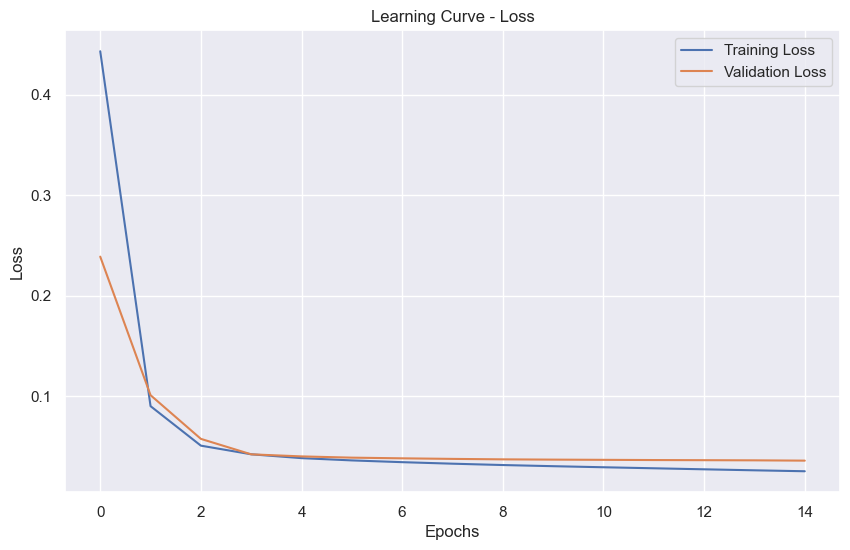

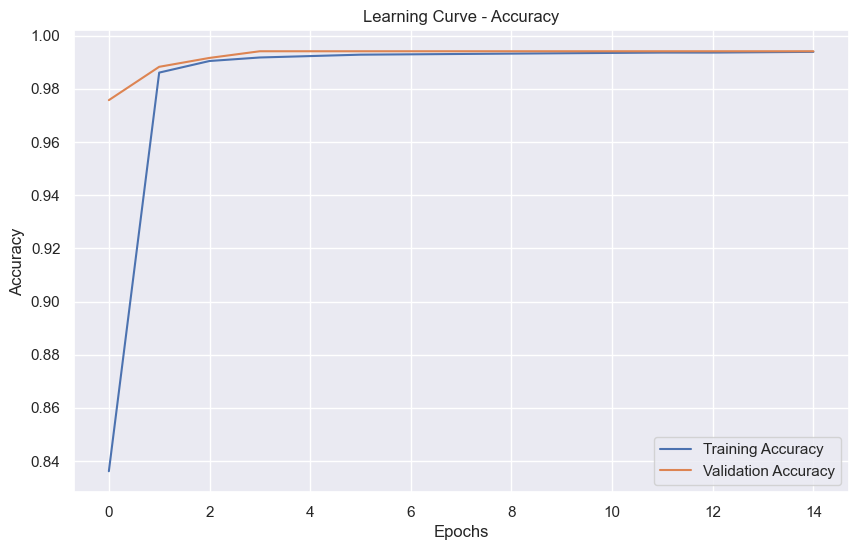

In [882]:
# Affichez les courbes d'apprentissage
history2 = train_model.history
df_history = pd.DataFrame(history2)

# Plot de la perte (loss) pour l'entraînement et la validation
plt.figure(figsize=(10, 6))
plt.plot(df_history['loss'], label='Training Loss')
plt.plot(df_history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot de la précision (accuracy) pour l'entraînement et la validation
plt.figure(figsize=(10, 6))
plt.plot(df_history['accuracy'], label='Training Accuracy')
plt.plot(df_history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sur les deux learning curve, il est complique d'observer un quelconque sur ou sous-ajustement.

On peut conclure que le modèle de réseau de neurones est très précis qu'importe l'ensemble.

Au fur et à mesure des "epochs" les ensembles d'entrainement et de test, convergent ensemble.

    Performance des modèles

In [883]:
# Évaluation sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_resampled, verbose=2)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

# Évaluation sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


237/237 - 1s - 3ms/step - accuracy: 0.9943 - loss: 0.0241
Training Loss: 0.024069514125585556, Training Accuracy: 0.994313657283783
38/38 - 0s - 6ms/step - accuracy: 0.9941 - loss: 0.0356
Validation Loss: 0.03561500087380409, Validation Accuracy: 0.9941471815109253


In [884]:

# Prédictions sur l'ensemble d'entraînement
y_train_prob = model.predict(X_train_scaled)
y_train_pred = (y_train_prob > 0.5).astype(int)

# Prédictions sur l'ensemble de validation
y_val_prob = model.predict(X_test_scaled)
y_val_pred = (y_val_prob > 0.5).astype(int)

# Calcul des métriques pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_resampled, y_train_pred)
train_precision = precision_score(y_resampled, y_train_pred)
train_recall = recall_score(y_resampled, y_train_pred)
train_f1 = f1_score(y_resampled, y_train_pred)
train_conf_matrix = confusion_matrix(y_resampled, y_train_pred)

# Calcul des métriques pour l'ensemble de validation
val_accuracy = accuracy_score(y_test, y_val_pred)
val_precision = precision_score(y_test, y_val_pred)
val_recall = recall_score(y_test, y_val_pred)
val_f1 = f1_score(y_test, y_val_pred)
val_conf_matrix = confusion_matrix(y_test, y_val_pred)

# Affichage des résultats
print("Métriques pour l'ensemble d'entraînement:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"Matrice de Confusion:\n{train_conf_matrix}")

print("\nMétriques pour l'ensemble de validation:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1 Score: {val_f1}")
print(f"Matrice de Confusion:\n{val_conf_matrix}")


107/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Métriques pour l'ensemble d'entraînement:
Accuracy: 0.9943136736313145
Precision: 0.9915833771699105
Recall: 0.9970907167416028
F1 Score: 0.9943294210734538
Matrice de Confusion:
[[3749   32]
 [  11 3770]]

Métriques pour l'ensemble de validation:
Accuracy: 0.9941471571906354
Precision: 0.9936775553213909
Recall: 0.9989406779661016
F1 Score: 0.9963021658742736
Matrice de Confusion:
[[246   6]
 [  1 943]]


    Tuner le modèle

**Cette partie n'a pas marché!.**

In [890]:
pip install scikeras


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [913]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Fonction pour créer le modèle Keras
def create_model(n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Créer le modèle wrapper pour scikit-learn
keras_clf = KerasClassifier(build_fn=create_model)

# Définir la grille de paramètres à explorer
params = {'model__n_neurons': [16, 32]}

# Effectuer la recherche par grille
grid_search = GridSearchCV(estimator=keras_clf, param_grid = params, cv=2)

grid_search.fit(X_train_scaled, y_resampled)

# Afficher les meilleurs paramètres et le meilleur score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8708 - loss: 0.4376


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9053 - loss: 0.4959


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8772 - loss: 0.4331


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8182 - loss: 0.4490


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/wrappers.py", line 536, in _fit_keras_model
    raise e
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/wrappers.py", line 531, in _fit_keras_model
    key = metric_name(key)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scikeras/utils/__init__.py", line 111, in metric_name
    fn_or_cls = keras_metric_get(metric)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/metrics/__init__.py", line 200, in get
    ...               "config": {"from_logits": True}}
ValueError: Could not interpret metric identifier: loss
